# Rossmann's Retail Chain Sales
### Data Cleansing & EDA

In [1]:
#library
import pandas as pd

#data
ss=pd.read_csv(r"/mnt/c/Users/GStampolidis/Desktop/Projects/sample_submission.csv")
store=pd.read_csv(r"/mnt/c/Users/GStampolidis/Desktop/Projects/store.csv")
test=pd.read_csv(r"/mnt/c/Users/GStampolidis/Desktop/Projects/test.csv")
train=pd.read_csv(r"/mnt/c/Users/GStampolidis/Desktop/Projects/train.csv")

/tmp/ipykernel_1109/3552004247.py:8: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train=pd.read_csv(r"/mnt/c/Users/GStampolidis/Desktop/Projects/train.csv")


In [ ]:
ss

In [ ]:
store

In [ ]:
train

In [ ]:
test

In [ ]:
#nrows and ncols of ss
nrow1 = ss.shape[0]
print(nrow1)

ncol1 = ss.shape[1]
print(ncol1)

In [ ]:
#nrows and ncols of Store data
nrow2 = store.shape[0]
print(nrow2)

ncol2 = store.shape[1]
print(ncol2)

In [ ]:
#nrows and ncols of Test data
nrow3 = test.shape[0]
print(nrow3)

ncol3 = test.shape[1]
print(ncol3)

In [ ]:
#nrows and ncols of Train data
nrow4 = train.shape[0]
print(nrow4)

ncol4 = train.shape[1]
print(ncol4)

In [2]:
#Merge Train data with Store data 
#The main dataset that will be used in this project
data=pd.merge(train,store, on="Store", how="left")

In [ ]:
#Nrows and ncols of DATA
nrow5 = data.shape[0]
print(nrow5)

ncol5= data.shape[1]
print(ncol5)

In [3]:
#Dataset that will contribute for predictions with ML models
#It contains information about future factors
t=pd.merge(test,store, on="Store", how="left")

In [ ]:
data

In [ ]:
#Variable types
print(data.info())

In [4]:
#change type of integers as factor
data['DayOfWeek'] = data['DayOfWeek'].astype('category')
data['Promo'] = data['Promo'].astype('category')
data['Open'] = data['Open'].astype('category')
data['SchoolHoliday'] = data['SchoolHoliday'].astype('category')
data['Promo2'] = data['Promo2'].astype('category')
data['CompetitionOpenSinceMonth'] = data['CompetitionOpenSinceMonth'].astype('category')
data['CompetitionOpenSinceYear'] = data['CompetitionOpenSinceYear'].astype('category')
data['Promo2SinceWeek'] = data['Promo2SinceWeek'].astype('category')
data['Promo2SinceYear'] = data['Promo2SinceYear'].astype('category')

In [5]:
#change type of integers as factor
t['DayOfWeek'] = t['DayOfWeek'].astype('category')
t['Promo'] = t['Promo'].astype('category')
t['Open'] = t['Open'].astype('category')
t['SchoolHoliday'] = t['SchoolHoliday'].astype('category')
t['Promo2'] = t['Promo2'].astype('category')
t['CompetitionOpenSinceMonth'] = t['CompetitionOpenSinceMonth'].astype('category')
t['CompetitionOpenSinceYear'] = t['CompetitionOpenSinceYear'].astype('category')
t['Promo2SinceWeek'] = t['Promo2SinceWeek'].astype('category')
t['Promo2SinceYear'] = t['Promo2SinceYear'].astype('category')

In [ ]:
#check for NA or NaN
na_columns=data.isna().any()
print(na_columns)

In [ ]:
#check for NA or NaN
na_columns=t.isna().any()
print(na_columns)

In [ ]:
#SD CALCULATION IN ORDER TO DECIDE IF I AM GOING TO USE MEDIAN OR MEAN VALUE TO REPLACE NA
#PANDAS IGNORE NA & NAN
print(data.describe())

#Variables have large sd so it is better to replace with median value
#I replace NAs in categorical variables with the most frequent value

In [6]:
median_value = data["CompetitionDistance"].median()
data["CompetitionDistance"] = data["CompetitionDistance"].fillna(median_value)

In [7]:
m_freq = data["CompetitionOpenSinceMonth"].mode()[0]
data["CompetitionOpenSinceMonth"] = data["CompetitionOpenSinceMonth"].fillna(m_freq)

In [8]:
m_freq = data["CompetitionOpenSinceYear"].mode()[0]
data["CompetitionOpenSinceYear"] = data["CompetitionOpenSinceYear"].fillna(m_freq)

In [9]:
m_freq = data["Promo2SinceWeek"].mode()[0]
data["Promo2SinceWeek"] = data["Promo2SinceWeek"].fillna(m_freq)

In [10]:
m_freq = data["Promo2SinceYear"].mode()[0]
data["Promo2SinceYear"] = data["Promo2SinceYear"].fillna(m_freq)

In [11]:
most_frequent = data["PromoInterval"].mode()[0]
data["PromoInterval"] = data["PromoInterval"].fillna(most_frequent)

In [12]:
#Replace NAs in test data
m_freq = t["Open"].mode()[0]
t["Open"] = t["Open"].fillna(m_freq)
median_value = t["CompetitionDistance"].median()
t["CompetitionDistance"] =t["CompetitionDistance"].fillna(median_value)
m_freq = t["CompetitionOpenSinceMonth"].mode()[0]
t["CompetitionOpenSinceMonth"] = t["CompetitionOpenSinceMonth"].fillna(m_freq)
m_freq = t["CompetitionOpenSinceYear"].mode()[0]
t["CompetitionOpenSinceYear"] = t["CompetitionOpenSinceYear"].fillna(m_freq)
m_freq = t["Promo2SinceWeek"].mode()[0]
t["Promo2SinceWeek"] = t["Promo2SinceWeek"].fillna(m_freq)
m_freq = t["Promo2SinceYear"].mode()[0]
t["Promo2SinceYear"] = t["Promo2SinceYear"].fillna(m_freq)
most_frequent = t["PromoInterval"].mode()[0]
t["PromoInterval"] = t["PromoInterval"].fillna(most_frequent)

In [ ]:
#check
na_columns=t.isna().any()
print(na_columns)

In [ ]:
#Open stores with no sales for some reasons
data[(data.Open == 1) & (data.Sales== 0)]

In [ ]:
#number of stores with zero sales
open_zero_sales=data[(data['Open']==1)&(data['Sales']==0)]
stores_with_zero_sales=open_zero_sales['Store'].nunique()
print(stores_with_zero_sales)

In [13]:
#Replace zero sales for open stores with median value
median_sales=data[(data['Open'] == 1)&(data['Sales'] > 0)]['Sales'].median()
data.loc[(data['Open'] == 1) & (data['Sales'] == 0), 'Sales'] = median_sales

In [14]:
#There are open stores with no customers
#Replace with median value of customers
median_cust = data[(data['Open'] == 1) & (data['Customers'] > 0)]['Customers'].median()
data.loc[(data['Open'] == 1) & (data['Customers'] == 0), 'Customers'] = median_cust

In [ ]:
#rows in data with closed stores and withouts sales
data[(data["Open"]==0) & (data["Sales"]==0)]

In [ ]:
#Check tha we have replaced NAs
na_columns_check1 = data.isna().any()
print(na_columns_check1)

In [ ]:
#Check for wrong data
data[data["Sales"]<0]

In [ ]:
#Check for wrong data
data[data["Customers"]<0]

In [ ]:
#Check for variable levels
print(data["Open"].unique())
data["StateHoliday"] =data["StateHoliday"].astype(str)
print(data["StateHoliday"].unique())
print(data["SchoolHoliday"].unique())
print(data["StoreType"].unique())
print(data["Assortment"].unique())
print(data["CompetitionOpenSinceMonth"].unique())
print(data["CompetitionOpenSinceYear"].unique())
print(data["Promo2"].unique())
print(data["Promo2SinceWeek"].unique())
print(data["Promo2SinceYear"].unique())
print(data["PromoInterval"].unique())

In [15]:
data['StateHoliday']=data['StateHoliday'].astype(str).str.strip()

In [ ]:
#Check for wrong data
data[data["CompetitionDistance"]<0]

# Descriptive statistics & Frequencies 

In [ ]:
#Library for skewness and kurtosis
from scipy.stats import skew, kurtosis

In [ ]:
data["PromoInterval"].value_counts()

In [ ]:
data["Promo2"].value_counts()

In [ ]:
data["Promo2SinceYear"].value_counts()

In [ ]:
data["Promo2SinceWeek"].value_counts()

In [ ]:
data["CompetitionOpenSinceYear"].value_counts()

In [ ]:
data["CompetitionOpenSinceMonth"].value_counts()

In [ ]:
data["CompetitionDistance"].describe()

In [ ]:
data["CompetitionDistance"].median()

In [ ]:
print(skew(data["CompetitionDistance"]))
print(kurtosis(data["CompetitionDistance"]))

In [ ]:
data["Assortment"].value_counts()

In [ ]:
data["StoreType"].value_counts()

In [ ]:
data["SchoolHoliday"].value_counts()

In [ ]:
data["StateHoliday"].value_counts()

In [ ]:
data["Promo"].value_counts()

In [ ]:
data["Open"].value_counts()

In [ ]:
data["Customers"].describe()

In [ ]:
data["Customers"].median()

In [ ]:
print(kurtosis(data["Customers"]))
print(skew(data["Customers"]))

In [ ]:
data["Sales"].describe()

In [ ]:
#Skewness and Kyrtosis
skewness=skew(data["Sales"])
kyr=kurtosis(data["Sales"])

In [ ]:
print(skewness)
print(kyr)

In [ ]:
data["DayOfWeek"].value_counts()

# Univariate Analysis with Plots

In [16]:
#libraries
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

In [ ]:
#Barplot for Promo2SinceWeek
plt.figure(figsize=(8, 6))
sns.countplot(y="Promo2SinceWeek", data=data, color="cyan")
plt.title("Barplot - Promo2SinceWeek")
plt.xlabel("Frequency")
plt.ylabel("Promo2SinceWeek")
plt.tight_layout()
plt.show()

In [ ]:
#Barplot for Promo2SinceYear
plt.figure(figsize=(8,6))
sns.countplot(y="Promo2SinceYear", data=data,color="cyan")
plt.title("Barplot - Promo2 Since Year")
plt.xlabel("Frequency")
plt.ylabel("Promo2SinceYear")
plt.tight_layout()
plt.show()

In [ ]:
#Barplot for PromoInterval
sns.countplot(x="PromoInterval", data=data,color="cyan")
plt.title("Barplot - PromoInterval")
plt.xlabel("PromoInterval")
plt.ylabel("Frequency")
plt.show()

In [ ]:
#Pie chart for Promo Interval with percentages
promo_counts=data['PromoInterval'].value_counts()
plt.pie(promo_counts,labels=promo_counts.index,autopct='%1.1f%%')
plt.title("Pie Chart-PromoInterval")

In [ ]:
##Barplot for Promo2
sns.countplot(x="Promo2", data=data,color="cyan")
plt.title("Barplot - Promo2")
plt.xlabel("Promo2")
plt.ylabel("Frequency")
from matplotlib.patches import Patch
custom_legend = [Patch(color="cyan", label="0=not participating/1=participating")]
plt.legend(handles=custom_legend, title="")
plt.show()

In [ ]:
## Horizontal Barplot for CompetitionOpenSinceYear
plt.figure(figsize=(8, 6))
sns.countplot(y="CompetitionOpenSinceYear", data=data, color="cyan")
plt.title("Barplot - Competition Open Since Year")
plt.xlabel("Frequency")
plt.ylabel("CompetitionOpenSinceYear")
plt.tight_layout()
plt.show()

In [ ]:
#Barplot for CompetitionOpenSinceMonth
sns.countplot(x="CompetitionOpenSinceMonth", data=data,color="cyan")
plt.title("Barplot - CompetitionOpenSinceMonth")
plt.xlabel("CompetitionOpenSinceMonth")
plt.ylabel("Frequency")
plt.show()

In [ ]:
#Boxplot for CompetitionDistance
sns.boxplot(y="CompetitionDistance", data=data, color="cyan")
plt.title("Boxplot -CompetitionDistance")
plt.ylabel("CompetitionDistance")
plt.show()

In [ ]:
#Histogram of CompetitionDistance
sns.histplot(data=data, x="CompetitionDistance",color="Cyan")
plt.title("Histogram of CompetitionDistance")
plt.xlabel("CompetitionDIstance")
plt.ylabel("Frequency")
plt.show()

In [ ]:
#Barplot for variety of products
sns.countplot(x="Assortment", data=data,color="cyan")
plt.title("Barplot - Assortment")
plt.xlabel("Assortment")
plt.ylabel("Frequency")
from matplotlib.patches import Patch
custom_legend = [Patch(color="cyan", label="a=basic/b=extra/c=extended")]
plt.legend(handles=custom_legend, title="")
plt.show()

In [ ]:
#Pie chart for variety of products with percentages
a=data['Assortment'].value_counts()
colors=['lightblue','lightgreen','lightcoral']
plt.pie(a,labels=a.index,colors=colors,autopct='%1.1f%%')
plt.title("Pie Chart - Assortment")
plt.legend(["Basic","Extended","Extra"],loc="best")
plt.show()

In [ ]:
#Barplot for StoreType
sns.countplot(x="StoreType", data=data,color="cyan")
plt.title("Barplot - Storetype")
plt.xlabel("StoreType")
plt.ylabel("Frequency")
from matplotlib.patches import Patch
custom_legend = [Patch(color="cyan", label="a=Beauty|b=Online |c=Health |d=Home")]
plt.legend(handles=custom_legend, title="")
plt.show()

In [ ]:
#Pie chart for storetype with percentages
st=data['StoreType'].value_counts()
colors=['lightblue','lightgreen','lightcoral',"lightyellow"]
plt.pie(st,labels=st.index,colors=colors,autopct='%1.1f%%')
plt.title("Pie Chart - StoreType")
plt.legend(["Beauty","Home","Health","Online"],loc="best")
plt.show()

In [ ]:
#Barplot with frequencies for SchoolHoliday
sns.countplot(x="SchoolHoliday", data=data,color="cyan")
plt.title("Barplot - SchoolHoliday")
plt.xlabel("SchoolHoliday")
plt.ylabel("Frequency")
from matplotlib.patches import Patch
custom_legend = [Patch(color="cyan", label="0=Not Affected / 1=Affected")]
plt.legend(handles=custom_legend, title="")
plt.show()

In [ ]:
#Barplot for StateHoliday
sns.countplot(x="StateHoliday", data=data,color="cyan")
plt.title("Barplot - StateHoliday")
plt.xlabel("StateHoliday")
plt.ylabel("Frequency")
from matplotlib.patches import Patch
custom_legend = [Patch(color="cyan", label="a=Public Holiday/ b=Easter/ c=Christmas/0=None")]
plt.legend(handles=custom_legend, title="")
plt.show()

In [ ]:
##Barplot for Promo
sns.countplot(x="Promo", data=data, color="cyan")
plt.title("Barplot - Promo")
plt.xlabel("Promo")
plt.ylabel("Frequency")
from matplotlib.patches import Patch
custom_legend = [Patch(color="cyan", label="0 = No Promo / 1 = Promo")]
plt.legend(handles=custom_legend, title="")
plt.show()

In [ ]:
#Barplot for open and closed stores
sns.countplot(x="Open", data=data, color="cyan")
plt.title("Barplot - Open")
plt.xlabel("Open")
plt.ylabel("Frequency")
from matplotlib.patches import Patch
custom_legend = [Patch(color="cyan", label="0 = Closed / 1 = Open")]
plt.legend(handles=custom_legend, title="")
plt.show()

In [ ]:
#Barplot for Dayofweek
sns.countplot(x="DayOfWeek", data=data, color="cyan")
plt.title("Barplot - DayOfWeek")
plt.xlabel("Day Of Week")
plt.ylabel("Frequency")
plt.show()

In [ ]:
#Histogram for sales
#Some stores were temporarily closed for refurbishment!
sns.histplot(data=data, x="Sales",color="Cyan")
plt.title("Histogram of Sales")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

In [ ]:
#Histogram of sales for open stores
os = data[data['Open'] == 1]
sns.histplot(data=os, x="Sales", color="cyan")
plt.title("Histogram of Sales for Open Stores")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

In [ ]:
#Boxplot of sales
sns.boxplot(y="Sales", data=data, color="cyan")
plt.title("Boxplot of Sales")
plt.ylabel("Sales")
plt.show()

In [ ]:
#Histogram of customers
sns.histplot(data=data, x="Customers",color="Cyan")
plt.title("Histogram of Customers")
plt.xlabel("Customers")
plt.ylabel("Frequency")
plt.show()

In [ ]:
#Boxplot of customers
sns.boxplot(y="Customers", data=data, color="cyan")
plt.title("Boxplot of Customers")
plt.ylabel("Customers")
plt.show()

# Correlation between variables

In [ ]:
#Libraries
from scipy.stats import kstest
import statsmodels.formula.api as smf
import numpy as np

In [ ]:
#Sales~Customers
print(data["Sales"].corr(data["Customers"], method='pearson'),
data["Sales"].corr(data["Customers"], method='spearman'),
data["Sales"].corr(data["Customers"], method='kendall'))

In [ ]:
#Plot between Sales~Customers
plt.scatter(data["Sales"], data["Customers"])
plt.title("Sales~Customers")
plt.xlabel("Sales")
plt.ylabel("Customers")

### Assumptions:
### Normality of residuals
### Homoscedasticity 
### Linearity
### Outliers
### Independence

### If model assumptions are not met then we use Kendall & Spearman methods for correlation

In [ ]:
#library
import statsmodels.formula.api as smf
#model sales~customers
model1=smf.ols("Sales~Customers",data=data).fit()
print(model1.summary())

#Jarque-Bera normality test (n>2000) indicates that residulas are not normally distributed 
#We have many outliers in Sales & Customers 
#We dont reject H0: Uncorrelated Residuals in Durbin Watson test

In [ ]:
#Normality test
residuals=model1.resid
statistic,p_value=kstest(residuals,'norm',args=(np.mean(residuals),np.std(residuals)))
print(f"Kolmogorov-Smirnov Statistic:{statistic}")
print(f"P-value:{p_value}")

In [ ]:
#Sales~CompetitionDistance
print(data["Sales"].corr(data["CompetitionDistance"], method='pearson'),
data["Sales"].corr(data["CompetitionDistance"], method='spearman'),
data["Sales"].corr(data["CompetitionDistance"], method='kendall'))

In [ ]:
#Plot for Sales~CompetitionDistance
plt.scatter(data["Sales"], data["CompetitionDistance"],color="cyan")
plt.title("Sales~CompetitionDistance")
plt.xlabel("Sales")
plt.ylabel("CompetitionDistance")

In [ ]:
#model Sales~CompetitionDistance
model2=smf.ols("Sales~CompetitionDistance",data=data).fit()
print(model2.summary())
#Jarque-Bera normality test indicates that residulas are not normally distributed 
#We have many outliers in Sales & CompetitionDistance
#We dont reject H0: Uncorrelated Residuals in Durbin Watson test
#There is no correlation between the 2 variables

In [ ]:
#Normality test with Kolmogorov Smirnov
residuals=model2.resid
statistic,p_value=kstest(residuals,'norm',args=(np.mean(residuals),np.std(residuals)))
print(f"Kolmogorov-Smirnov Statistic:{statistic}")
print(f"P-value:{p_value}")

In [ ]:
#Customers~CompetitionDistance
print(data["Customers"].corr(data["CompetitionDistance"], method='pearson'),
data["Customers"].corr(data["CompetitionDistance"], method='spearman'),
data["Customers"].corr(data["CompetitionDistance"], method='kendall'))

In [ ]:
#Plot customers~competitionDistance
plt.scatter(data["Customers"], data["CompetitionDistance"],color="cyan")
plt.title("Customers~CompetitionDistance")
plt.xlabel("Customers")
plt.ylabel("CompetitionDistance")

In [ ]:
#model Customers~CompetitionDistance
model3=smf.ols("Customers~CompetitionDistance",data=data).fit()
print(model3.summary())
#Jarque-Bera normality test indicates that residulas are not normally distributed 
#We have many outliers in Customers & CompetitionDistance
#We dont reject H0: Uncorrelated Residuals in Durbin Watson test
#There is no correlation between the 2 variables

In [ ]:
#Normality test
residuals=model3.resid
statistic,p_value=kstest(residuals,'norm',args=(np.mean(residuals),np.std(residuals)))
print(f"Kolmogorov-Smirnov Statistic:{statistic}")
print(f"P-value:{p_value}")

### Correlation for categorical~categorical
### X^2 test with H0: No relationship vs H1:There is relationship 
### a=5%

In [ ]:
#PROMO~SCHOOLHOLIDAY
from scipy import stats
table=pd.crosstab(data['Promo'],data['SchoolHoliday'])
chi_stat, p_value, df, expected = stats.chi2_contingency(table)
print(p_value,chi_stat,expected)

#p-value<a so we reject H0
#School Holidays have impact on whether a promo will take place or not

In [ ]:
#PROMO~STATEHOLIDAY
#data['Promo'] = data['Promo'].astype(str)
data['StateHoliday'] = data['StateHoliday'].astype(str)
table1 = pd.crosstab(data['Promo'], data['StateHoliday'])
chi_stat,p_val,df,expected_val=stats.chi2_contingency(table1)
print(p_val,chi_stat)

#State Holidays have impact on whether a promo will take place or not

### Non parametric Wilcoxon test for Sales~Promo & Promo2 
### H0:There aren't differences between the mean values VS H1:Not H0


In [ ]:
from scipy.stats import mannwhitneyu
#Check if there is statistical important differences in sales between stores that run either promo or promo 2 and stores that do not

#promo
promo_sales_yes=data[data['Promo']==1]['Sales']  
promo_sales_no=data[data['Promo']==0]['Sales'] 

#promo2
promo2_sales_yes=data[data['Promo2']==1]['Sales']  
promo2_sales_no=data[data['Promo2']==0]['Sales'] 

#Wilcoxon Test
w_stat_promo, p_value_promo = mannwhitneyu(promo_sales_yes, promo_sales_no)
print(w_stat_promo,p_value_promo)
w_stat_promo2,p_value_promo2 = mannwhitneyu(promo2_sales_yes, promo2_sales_no)
print(w_stat_promo2,p_value_promo2)

#Both promo and promo2 have impact on sales

## Multivariate Analysis with Plots

In [17]:
import numpy as np
#Date as DataTime 
if not np.issubdtype(data['Date'].dtype,np.datetime64):
    data['Date']=pd.to_datetime(data['Date'],format='%Y-%m-%d')
#Cut Date
data['year']=data['Date'].dt.year
data['month']=data['Date'].dt.month
data['day']=data['Date'].dt.day

In [ ]:
#Sales ~ Date
data['Date']=pd.to_datetime(data['Date'])
data=data.sort_values(by='Date')

# Plot
plt.figure(figsize=(10,5))
plt.plot(data['Date'],data['Sales'],color='blue')
plt.title("Total Sales per Day")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

In [ ]:
#Boxplot for Sales per Year
sns.boxplot(x='year',y='Sales',data=data,color="cyan")
plt.title('Sales per Year')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
#Median Sales per year
median_sales_per_year = data.groupby('year')['Sales'].median().reset_index()
print(median_sales_per_year)

In [ ]:
#Boxplot for Sales per month
sns.boxplot(x='month',y='Sales',data=data,color="cyan")
plt.title('Sales per Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
#Information for Dates with most sales
top_sales=data.sort_values(by='Sales',ascending=False).head(20) 
print(top_sales[['Date', 'Sales', 'Promo', 'StateHoliday','SchoolHoliday',"Promo2","StoreType","Assortment","DayOfWeek","Store"]])

In [ ]:
#Tables with frequencies for big sales
print(top_sales['Promo'].value_counts())
print(top_sales['StateHoliday'].value_counts())
print(top_sales['SchoolHoliday'].value_counts())
print(top_sales['Promo2'].value_counts())
print(top_sales['StoreType'].value_counts())
print(top_sales['Assortment'].value_counts())
print(top_sales['DayOfWeek'].value_counts())
print(top_sales['Store'].value_counts())

In [ ]:
#Boxplot for CompetitionStart Year
plt.figure(figsize=(13,9))
sns.boxplot(data=data, x='CompetitionOpenSinceYear', y='Sales',color="cyan")
plt.title('Sales by Competition Start Year', fontsize=16)
plt.xlabel('Competition Start Year',fontsize=12)
plt.ylabel('Sales',fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
#Boxplot Sales~CompettitionStartMonth
plt.figure(figsize=(15, 10))
sns.boxplot(data=data, x='CompetitionOpenSinceMonth', y='Sales',color="cyan")
plt.title('Sales by Competition Start Month', fontsize=16)
plt.xlabel('Competition Start Month',fontsize=12)
plt.ylabel('Sales',fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
#Boxplot for sales~PromoInterval (Months that promo2 starts)
sns.boxplot(data=data, x='PromoInterval', y='Sales',color="cyan")
plt.title("Sales based on PromotionInterval")

In [ ]:
#Sales~Assortment
sns.boxplot(data=data, x='Assortment', y='Sales',color="cyan")
plt.title("Sales by Assortment of Stores")
from matplotlib.patches import Patch
custom_legend = [Patch(color="cyan", label="a=basic/b=extra/c=extended")]
plt.legend(handles=custom_legend, title="")

In [ ]:
#Sales~StoreType
sns.boxplot(data=data, x='StoreType', y='Sales',color="cyan")
plt.title("Sales by Type of The Store")

In [ ]:
#Sales~SchoolHoliday
sns.boxplot(data=data, x='SchoolHoliday', y='Sales',color="cyan")
plt.title("Sales in SchoolHoliday")
from matplotlib.patches import Patch
custom_legend = [Patch(color="cyan", label="0=No/1=Yes")]
plt.legend(handles=custom_legend, title="")

In [ ]:
#Sales~StateHoliday
sns.boxplot(data=data, x='StateHoliday', y='Sales',color="cyan")
plt.title("Sales in StateHoliday")
from matplotlib.patches import Patch
custom_legend = [Patch(color="cyan", label="a=Public Holiday/ b=Easter/ c=Christmas/0=None")]
plt.legend(handles=custom_legend, title="")

In [ ]:
#Daily Sales
sns.boxplot(data=data, x='DayOfWeek', y='Sales',color="cyan")
plt.title("Sales per Day")

In [ ]:
#Sales based on Promo and Promo2
fig,ax=plt.subplots(1, 2,figsize=(14, 6))
sns.boxplot(data=data,x='Promo',y='Sales',color="blue",ax=ax[0])
ax[0].set_title("Sales With and Without Promo")
custom_legend_1=[Patch(color="blue",label="0=No Promo/1=Promo")]
ax[0].legend(handles=custom_legend_1, title="")

sns.boxplot(data=data,x='Promo2',y='Sales',color="grey",ax=ax[1])
ax[1].set_title("Sales With and Without Promo2")
custom_legend_2=[Patch(color="grey",label="0=No Continuous Promo /1 = Continuous Promo")]
ax[1].legend(handles=custom_legend_2, title="")

plt.suptitle("Sales Based on Promo and Promo2", fontsize=16)

plt.tight_layout()
plt.subplots_adjust(top=0.85) 
plt.show()

In [ ]:
#Customers ~ Date
data['Date']=pd.to_datetime(data['Date'])
data=data.sort_values(by='Date')

# Plot
plt.figure(figsize=(10,5))
plt.plot(data['Date'],data['Customers'],color='blue')
plt.title("Customers per Day")
plt.xlabel("Date")
plt.ylabel("Customers")
plt.show()

In [ ]:
#Boxplot for customers~year
sns.boxplot(x='year',y='Customers',data=data,color="cyan")
plt.title('Customers per Year')
plt.xlabel('Year')
plt.ylabel('Customers')
plt.tight_layout()
plt.show()

In [ ]:
#Customers per month
sns.boxplot(x='month',y='Customers',data=data,color="cyan")
plt.title('Customers per Month')
plt.xlabel('Month')
plt.ylabel('Customers')
plt.tight_layout()

In [ ]:
# Dates with most customers
top_customers=data.sort_values(by='Customers',ascending=False).head(5) 
print(top_customers[['Date', 'Customers', 'Promo', 'StateHoliday', 'SchoolHoliday',"Promo2","StoreType","Assortment","DayOfWeek","Store"]])

In [ ]:
#Tables with frequencies for many customers
print(top_customers['Promo'].value_counts())
print(top_customers['StateHoliday'].value_counts())
print(top_customers['SchoolHoliday'].value_counts())
print(top_customers['Promo2'].value_counts())
print(top_customers['StoreType'].value_counts())
print(top_customers['Assortment'].value_counts())

In [ ]:
#Customers per day
sns.boxplot(data=data, x='DayOfWeek', y='Customers',color="cyan")
plt.title("Customers per Day")

## Multivariate Analysis with Plots for 3 Variables

In [ ]:
#Boxplot for sales per storetype and assortment
plt.figure(figsize=(15, 10))
sns.boxplot(x='StoreType', y='Sales', hue='Assortment', data=data, 
            palette={'a': 'blue', 'b': 'green', 'c': 'red'})
plt.title('Sales by StoreType and Assortment')
plt.xlabel('StoreType')
plt.ylabel('Sales')
handles, _ = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, 
           labels=['Basic (a)',  'Extended (c)','Extra (b)'], 
           title='Assortment')
plt.show()

In [ ]:
#Boxplot for sales per storetype and Promo
plt.figure(figsize=(10,6))
sns.boxplot(x='StoreType', y='Sales',hue='Promo',data=data)
plt.title('Sales by StoreType and Promo')
plt.xlabel('StoreType')
plt.ylabel('Sales')
plt.legend(title='Promo-> 0=NO & 1=YES')

In [ ]:
#Boxplot for sales per storetype and promo2
plt.figure(figsize=(10,6))
sns.boxplot(x='StoreType', y='Sales',hue='Promo2',data=data)
plt.title('Sales by StoreType and Promo2')
plt.xlabel('StoreType')
plt.ylabel('Sales')
plt.legend(title='Promo2-> 0=NO & 1=YES')

In [ ]:
##Boxplot for sales by assortment and stateholiday
plt.figure(figsize=(10,6))
sns.barplot(x='Assortment', y='Sales',hue='StateHoliday',data=data)
plt.title('Sales by Assortment & StateHoliday')
plt.xlabel('Assortment')
plt.ylabel('Sales')
plt.legend(title='StateHoliday')

In [ ]:
#Sales~Assortment & SchoolHoliday
plt.figure(figsize=(10,6))
sns.barplot(x='Assortment', y='Sales',hue='SchoolHoliday',data=data)
plt.title('Sales by Assortment & SchoolHoliday')
plt.xlabel('Assortment')
plt.ylabel('Sales')
plt.legend(title='SchoolHoliday-> 0=No & 1=YES')

In [ ]:
#Sales~Storetype and stateholiday
plt.figure(figsize=(15,10))
sns.barplot(x='StoreType', y='Sales',hue='StateHoliday',data=data)
plt.title('Sales by StoreType and StateHoliday')
plt.xlabel('StoreType')
plt.ylabel('Sales')
plt.legend(title='StateHoliday->0=None/a=Public Holiday/b=Easter/ c=Christmas')

In [ ]:
#Sales~Storetype and schoolholiday
plt.figure(figsize=(15,10))
sns.boxplot(x='StoreType', y='Sales',hue='SchoolHoliday',data=data)
plt.title('Sales by StoreType and SchoolHoliday')
plt.xlabel('StoreType')
plt.ylabel('Sales')
plt.legend(title='SchoolHoliday')

In [ ]:
#Customers~Storetype and assortment
plt.figure(figsize=(15,10))
sns.boxplot(x='StoreType', y='Customers',hue='Assortment',data=data)
plt.title('Customers by StoreType and Assortment')
plt.xlabel('StoreType')
plt.ylabel('Customers')
plt.legend(title='Assortment')

In [ ]:
#Customers~Storetype and promo
plt.figure(figsize=(15,10))
sns.boxplot(x='StoreType', y='Customers',hue='Promo',data=data)
plt.title('Customers by StoreType and Promo')
plt.xlabel('StoreType')
plt.ylabel('Customers')
plt.legend(title='Promo-> 0=NO & 1=YES')

In [ ]:
#Customers~Storetype and promo2
plt.figure(figsize=(15,10))
sns.boxplot(x='StoreType', y='Customers',hue='Promo2',data=data)
plt.title('Customers by StoreType and Promo2')
plt.xlabel('StoreType')
plt.ylabel('Customers')
plt.legend(title='Promo2-> 0=NO & 1=YES')

In [ ]:
#Customers~Storetype and schoolholiday
plt.figure(figsize=(15,10))
sns.boxplot(x='StoreType', y='Customers',hue='SchoolHoliday',data=data)
plt.title('Customers by StoreType and SchoolHoliday')
plt.xlabel('StoreType')
plt.ylabel('Customers')
plt.legend(title='SchoolHoliday-> 0=NO & 1=YES')

In [ ]:
##Customers~Storetype and stateholiday
plt.figure(figsize=(15,10))
sns.barplot(x='StoreType', y='Customers',hue='StateHoliday',data=data)
plt.title('Customers by StoreType and StateHoliday')
plt.xlabel('StoreType')
plt.ylabel('Customers')
plt.legend(title="StateHoliday-> a=Public Holiday/ b=Easter/ c=Christmas/0=None")

## Feature Engineering 
### PromotionFlags (Promo & Promo2) - HolidayIndicators (SchoolHoliday & StateHoliday) 

In [18]:
#PromotionFlags
data['PromotionFlags']=((data['Promo']==1)|(data['Promo2']==1)).astype(int)
data["PromotionFlags"].value_counts() #check

PromotionFlags
1    703242
0    313967
Name: count, dtype: int64

In [19]:
# StateHoliday as a binary variable
data['StateHolidayIndicators']=data['StateHoliday'].apply(lambda x: 1 if str(x).strip() in ['a','b','c'] else 0).astype(int)
data['HolidayIndicators']=((data['StateHolidayIndicators']==1)|(data['SchoolHoliday']==1)).astype(int)
data["HolidayIndicators"].value_counts() #Check

HolidayIndicators
0    819949
1    197260
Name: count, dtype: int64

In [ ]:
#Boxplot for sales~PromotionFlags
sns.boxplot(x=data["PromotionFlags"],y="Sales",data=data)
plt.title('Sales with Promotion or not')
plt.legend(title="0=No promo / 1= Promo")

In [ ]:
#Sales For sales ~HolidayIndicators
sns.boxplot(y="Sales",x="HolidayIndicators",data=data)
plt.title('Sales in Holidays or not')
plt.legend(title="0=No Holidays/ 1= Holidays")

In [ ]:
#Promo during Holiday
holiday_with_promo=data[(data['HolidayIndicators']==1)&(data['PromotionFlags']==1)].shape[0]
total_holidays=data[data['HolidayIndicators']==1].shape[0]
percentage_promo_during_holiday=((holiday_with_promo/total_holidays)*100) 

#Promo without holiday
non_holiday_with_promo=data[(data['HolidayIndicators']==0) &(data['PromotionFlags']==1)].shape[0]
total_non_holidays=data[data['HolidayIndicators']==0].shape[0]
percentage_promo_during_non_holiday=((non_holiday_with_promo/total_non_holidays) * 100) 

#results
print(f"Promo during Holiday:{percentage_promo_during_holiday:.2f}%")
print(f"Promo without Holiday:{percentage_promo_during_non_holiday:.2f}%")

# Time Series & Machine Learning Models

## Time Series -> ARIMA & Prophet

In [20]:
#Time Series 
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import month_plot,quarter_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import root_mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
from prophet import Prophet
from pmdarima import auto_arima ,ARIMA, model_selection
from prophet.diagnostics import performance_metrics
from prophet.diagnostics import cross_validation
from sklearn.metrics import r2_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
import warnings
warnings.filterwarnings("ignore")

In [21]:
#split the dataset in test & train
split_date = '2015-07-01'
train_data=data[data['Date']<split_date].copy()
test_data =data[data['Date']>=split_date].copy()

In [ ]:
#check
print(train_data["Date"])
print(test_data["Date"])
train_data['Sales']=train_data['Sales'].astype(float)

In [22]:
#Rename Sales as y
data["Sales"]=data["Sales"].astype(float)
data=data.rename(columns={"Sales":"y"})

train_data["Sales"]=train_data["Sales"].astype(float)
train_data=train_data.rename(columns={"Sales":"y"})

test_data["Sales"]=test_data["Sales"].astype(float)
test_data=test_data.rename(columns={"Sales":"y"})

### Augmented Dickey Fuller Test for time series stationarity
### H0:Non Stationary Time series VS H1:Stationarity
### Non Stationary Time series -> Differencing Method

In [ ]:
#significance level
alpha = 0.05

#Data for every store
stores=data['Store'].drop_duplicates()
df_subsets={store:data[data['Store']==store] for store in stores}

#Dickey Fuller test ->H0:Non Stationary H1:Stationary 
for store, store_data in df_subsets.items():
    sales=store_data['y'] 
    result=adfuller(sales)
    p_value=result[1]
    
    # check
    if p_value > alpha:
        print(f"Store{store}: Non Stationary (p-value = {p_value}) Needs Differencing")
        sales_diff=sales.diff().dropna()  #Differencing method
        print(f"Differencing data for {store}:")
        print(sales_diff.head())
    else:
        print(f"Store {store}: Stationary (p-value = {p_value})")

In [ ]:
#ACF plot for Total sales in order to check the trend for seasonality
grouped_sales = data.groupby('Date')['y'].sum()
grouped_sales.index = pd.to_datetime(grouped_sales.index)
grouped_sales.sort_index(inplace=True)

#ACF plot for seasonality check
plot_acf(grouped_sales,lags=30)
plt.title('Autocorrelation of Total Sales')
plt.show()

In [ ]:
#Seasonal decompose for store ID
my_series=data[data["Store"]==12]
result = seasonal_decompose(my_series['y'],period=7)
result.plot()

In [ ]:
#seasonality for a specific store
store_id = 262
store_data = train_data[train_data["Store"] == store_id].copy()
store_data["Date"] = pd.to_datetime(store_data["Date"])
store_data.set_index("Date", inplace=True)
store_data.sort_index(inplace=True)
plot_acf(store_data['y'], lags=30)
plt.title(f'Autocorrelation for Store {store_id}')
plt.show()

## ARIMA models for sales forecasting in StoreTypes A,B,C & D

In [ ]:
#future periods
n_periods=len(test)

In [ ]:
#ARIMA model for Store Types
#StoreType -> A
store_type='a'

#split data in test & train for storetype A
train=train_data[train_data['StoreType']==store_type].groupby('Date')['y'].sum()
test=test_data[test_data['StoreType']==store_type].groupby('Date')['y'].sum()
train.index = pd.to_datetime(train.index)
train.sort_index(inplace=True)
test.index = pd.to_datetime(test.index)
test.sort_index(inplace=True)

#mean sales
test_store=test_data[test_data['StoreType'] == store_type]
mean_sales=test_store['y'].mean()

#ARIMA model
model_a=auto_arima(train,seasonal=True,m=7, trace=True,error_action='ignore',suppress_warnings=True,stepwise=True)
model_a.fit(train)
print(model_a.summary())

#Predicitions 
n_periods=len(test)
forecast_a=model_a.predict(n_periods=n_periods)
print(forecast_a)

#Future Predictions (August & mid-September)
future_dates = pd.date_range(start='2015-08-01', end='2015-09-17')
forecast_future = model_a.predict(n_periods=len(future_dates))

#Model fit with statistics
#Small AIC & BIC
#Ljung Box Test for Autocorrelation of the resiudals -> P-value<a there is no autocorrelation
#Heteroskedasticity test in the output -> P-value<0.05 problem with heteroskedasticity 
#Jarque Bera for Normality check
#RMSE,MAPE,MAE
y_real=test.values
y_pred=forecast_a
rmse=np.sqrt(mean_squared_error(y_real,y_pred))
mape=mean_absolute_percentage_error(y_real,y_pred)
mae=mean_absolute_error(y_real,y_pred)
print(f"RMSE: {rmse:.2f}")
print(f" MAPE: {mape:.2f}")
print(f" MAE: {mae:.2f}")
resid=pd.Series(model_a.resid()) #model residuals
plot_acf(resid)
plot_pacf(resid)
plt.show()

# Plot for predictions vs real sales
plt.figure(figsize=(14,7))
plt.plot(test.index, y_real, label='Real Sales (July)', color='blue')
plt.plot(test.index, y_pred, label='Predicted Sales (July)', color='red')

#Predicitions for August & september
plt.plot(future_dates, forecast_future, label='Forecast (Aug - Sep)', color='green', linestyle='--')
plt.title(f'ARIMA predicitions vs Actual for StoreType {store_type}')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.suptitle(f"RMSE:{rmse:.1f}|Mean Sales:{mean_sales:.1f}|MAE:{mae:.1f}| MAPE:{mape:.1f}",fontsize=10)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
#mean sales for storetype b
test_store=test_data[test_data['StoreType'] == 'd']
mean_sales=test_store['y'].mean()
print(mean_sales)

In [ ]:
#ARIMA model for Store Types
#StoreType -> B
store_type='b'

#split data in test & train for storetype B
train=train_data[train_data['StoreType']==store_type].groupby('Date')['y'].sum()
test=test_data[test_data['StoreType']==store_type].groupby('Date')['y'].sum()
train.index = pd.to_datetime(train.index)
train.sort_index(inplace=True)
test.index = pd.to_datetime(test.index)
test.sort_index(inplace=True)

#ARIMA model
model_b=auto_arima(train,seasonal=True,m=7, trace=True,error_action='ignore',suppress_warnings=True,stepwise=True)
model_b.fit(train)
print(model_b.summary())

#Predicitions for next month
forecast_b=model_b.predict(n_periods=n_periods)
print(forecast_b)

#Future Predictions (August & mid-September)
future_dates = pd.date_range(start='2015-08-01', end='2015-09-17')
forecast_future = model_b.predict(n_periods=len(future_dates))

#mean sales
test_store=test_data[test_data['StoreType'] == store_type]
mean_sales=test_store['y'].mean()

#Model fit with statistics
#Small AIC & BIC
#Ljung Box Test for Autocorrelation of the resiudals -> P-value<a there is no autocorrelation
#Heteroskedasticity test in the output -> P-value<0.05 problem with heteroskedasticity 
#Jarque Bera for Normality check
#RMSE,MAPE,MAE
y_real=test.values
y_pred=forecast_b
rmse=np.sqrt(mean_squared_error(y_real,y_pred))
mape=mean_absolute_percentage_error(y_real,y_pred)
mae=mean_absolute_error(y_real,y_pred)
print(f"RMSE: {rmse:.2f}")
print(f" MAPE: {mape:.2f}")
print(f" MAE: {mae:.2f}")
resid=pd.Series(model_b.resid()) #residuals
plot_acf(resid)
plot_pacf(resid)
plt.show()

# Plot for predictions vs real sales
plt.figure(figsize=(12,6))
plt.plot(test.index,y_real,label='Real Sales',color='blue')
plt.plot(test.index,y_pred,label='Predictions',color='red')
plt.plot(future_dates, forecast_future, label='Forecast (Aug - Sep)', color='green', linestyle='--')
plt.title(f'ARIMA predicitions vs Actual for StoreType {store_type}')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.suptitle(f"RMSE:{rmse:.1f}|Mean Sales:{mean_sales:.1f}|MAE:{mae:.1f}| MAPE:{mape:.1f}",fontsize=10)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
#mean sales for b
test_store=test_data[test_data['StoreType'] == 'b']
mean_sales=test_store['y'].mean()
print(mean_sales)

In [ ]:
#ARIMA model for Store Types
#StoreType -> C
store_type='c'

#split data in test & train for storetype C
train=train_data[train_data['StoreType']==store_type].groupby('Date')['y'].sum()
test=test_data[test_data['StoreType']==store_type].groupby('Date')['y'].sum()
train.index = pd.to_datetime(train.index)
train.sort_index(inplace=True)
test.index = pd.to_datetime(test.index)
test.sort_index(inplace=True)

#ARIMA model
model_c=auto_arima(train,seasonal=True,m=7, trace=True,error_action='ignore',suppress_warnings=True,stepwise=True)
model_c.fit(train)
print(model_c.summary())

#Predicitions for next month
forecast_c=model_c.predict(n_periods=n_periods)
print(forecast_c)

#Future Predictions (August & mid-September)
future_dates = pd.date_range(start='2015-08-01', end='2015-09-17')
forecast_future = model_c.predict(n_periods=len(future_dates))

#Model fit with statistics
#Small AIC & BIC
#Ljung Box Test for Autocorrelation of the resiudals -> P-value<a there is no autocorrelation
#Heteroskedasticity test in the output -> P-value<0.05 problem with heteroskedasticity 
#Jarque Bera for Normality check
#RMSE,MAPE,MAE
y_real=test.values
y_pred=forecast_c
rmse=np.sqrt(mean_squared_error(y_real,y_pred))
mape=mean_absolute_percentage_error(y_real,y_pred)
mae=mean_absolute_error(y_real,y_pred)
print(f"RMSE: {rmse:.2f}")
print(f" MAPE: {mape:.2f}")
print(f" MAE: {mae:.2f}")
resid=pd.Series(model_c.resid())
plot_acf(resid)
plot_pacf(resid)
plt.show()

# Plot for predictions vs real sales
plt.figure(figsize=(12,6))
plt.plot(test.index,y_real,label='Real Sales',color='blue')
plt.plot(test.index,y_pred,label='Predictions',color='red')
plt.plot(future_dates, forecast_future, label='Forecast (Aug - Sep)', color='green', linestyle='--')
plt.title(f'ARIMA predicitions vs actual for StoreType {store_type}')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.suptitle(f"RMSE:{rmse:.1f}|MAE:{mae:.1f}| MAPE:{mape:.1f}",fontsize=10)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
#ARIMA model for Store Types
#StoreType -> D
store_type='d'

#split data in test & train for storetype D
train=train_data[train_data['StoreType']==store_type].groupby('Date')['y'].sum()
test=test_data[test_data['StoreType']==store_type].groupby('Date')['y'].sum()
train.index = pd.to_datetime(train.index)
train.sort_index(inplace=True)
test.index = pd.to_datetime(test.index)
test.sort_index(inplace=True)

#ARIMA model
model_d=auto_arima(train,seasonal=True,m=7, trace=True,error_action='ignore',suppress_warnings=True,stepwise=True)
model_d.fit(train)
print(model_d.summary())

#Predicitions for next month
forecast_d=model_d.predict(n_periods=n_periods)
print(forecast_d)

#Future Predictions (August & mid-September)
future_dates = pd.date_range(start='2015-08-01', end='2015-09-17')
forecast_future = model_d.predict(n_periods=len(future_dates))

#Model fit with statistics
#Small AIC & BIC
#Ljung Box Test for Autocorrelation of the resiudals -> P-value<a there is no autocorrelation
#Heteroskedasticity test in the output -> P-value<0.05 problem with heteroskedasticity 
#Jarque Bera for Normality check
#RMSE,MAPE,MAE
y_real=test.values
y_pred=forecast_d
rmse=np.sqrt(mean_squared_error(y_real,y_pred))
mape=mean_absolute_percentage_error(y_real,y_pred)
mae=mean_absolute_error(y_real,y_pred)
print(f"RMSE: {rmse:.2f}")
print(f" MAPE: {mape:.2f}")
print(f" MAE: {mae:.2f}")
resid=pd.Series(model_d.resid())
plot_acf(resid)
plot_pacf(resid)
plt.show()

# Plot for predictions vs real sales
plt.figure(figsize=(12,6))
plt.plot(test.index,y_real,label='Real Sales',color='blue')
plt.plot(test.index,y_pred,label='Predictions',color='red')
plt.plot(future_dates, forecast_future, label='Forecast (Aug - Sep)', color='green', linestyle='--')
plt.title(f'ARIMA predicitions vs Actual for StoreType {store_type}')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.suptitle(f"RMSE:{rmse:.1f}|MAE:{mae:.1f}| MAPE:{mape:.1f}",fontsize=10)
plt.legend()
plt.tight_layout()
plt.show()

## ARIMA models for Stores sales forecasting

In [ ]:
#Total sales per stores
store_sales=data.groupby('Store')['y'].sum()

#Store with most sales
top_store=store_sales.idxmax()
top_sales=store_sales.max()

#Store with least sales
bottom_store=store_sales.idxmin()
bottom_sales=store_sales.min()

print(f"Store with most sales is: {top_store} with total sales {top_sales}")
print(f"Store with least sales is: {bottom_store} with total sales {bottom_sales}")

print("Top 5 stores with most sales:")
print(store_sales.sort_values(ascending=False).head(5))

print("Top 5 Stores with lowest sales:")
print(store_sales.sort_values(ascending=True).head(5))

In [ ]:
#mean sales in test data for a specific store in order to compare its model accuracy
test_store=test_data[test_data['Store'] == 7]
mean_sales=test_store['y'].mean()
print(mean_sales)

In [ ]:
#Arima model for one store at a time
Store_ID=500
#Store_ID=np.random.choice(range(1,data["Store"].max()))   #OR Store_ID=... for a specific store 
print(Store_ID)

#Train & Test data
train_store=train_data[train_data["Store"]==Store_ID].copy()
test_store=test_data[test_data["Store"]==Store_ID].copy()
train_store["Date"]=pd.to_datetime(train_store["Date"])
test_store["Date"]=pd.to_datetime(test_store["Date"])
train_store.set_index("Date",inplace=True)
test_store.set_index("Date",inplace=True)
train_store.sort_index(inplace=True)
test_store.sort_index(inplace=True)

#mean sales
mean_sales=test_store['y'].mean()

##Arima with seasonality and data for every day
model=auto_arima(train_store["y"],seasonal=True, m=7,trace=False,suppress_warnings=False,stepwise=True)
print(model.summary())

#Predictions
#future periods
n_periods=len(test_store)
prediction_arima=model.predict(n_periods=n_periods)
#prediction_arima[prediction_arima<0]=0
print(prediction_arima)

#Future Predictions (August & mid-September)
future_dates = pd.date_range(start='2015-08-01',end='2015-09-17')
forecast_future = model.predict(n_periods=len(future_dates))

#Model Fit with statistics
#Small AIC & BIC
#Ljung Box Test for Autocorrelation of the resiudals -> P-value<a there is no autocorrelation
#Heteroskedasticity test in the output -> P-value<0.05 problem with heteroskedasticity 
#Jarque Bera for Normality check
#RMSE,MAPE,MAE
rmse=np.sqrt(mean_squared_error(test_store["y"],prediction_arima))
mae=mean_absolute_error(test_store["y"],prediction_arima)
mape=mean_absolute_percentage_error(test_store["y"],prediction_arima)
print(f"RMSE: {rmse:.2f}")
print(f" MAPE: {mape:.2f}")
print(f" MAE: {mae:.2f}")
resid=pd.Series(model.resid()) #residuals
plot_acf(resid)
plot_pacf(resid)
plt.show()

#Plot predictions vs real sales
plt.figure(figsize=(13,7))
plt.plot(test_store.index,test_store["y"],label="Real Sales", color='blue')
plt.plot(test_store.index,prediction_arima,label="Predicted Sales",color='red')
plt.plot(future_dates, forecast_future, label='Forecast (Aug - Sep)', color='green', linestyle='--')
plt.title(f"ARIMA Sales Predicitions for Store {Store_ID}")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.suptitle(f"RMSE:{rmse:.1f}|Mean sales:{mean_sales:.1f}|MAE:{mae:.1f}| MAPE:{mape:.1f}",fontsize=10)
plt.legend()
plt.show()

In [ ]:
#Arima model for store 543 with seasonality every 14 days
Store_ID=543
print(Store_ID)

#Train & Test data
train_store=train_data[train_data["Store"]==Store_ID].copy()
test_store=test_data[test_data["Store"]==Store_ID].copy()
train_store["Date"]=pd.to_datetime(train_store["Date"])
test_store["Date"]=pd.to_datetime(test_store["Date"])
train_store.set_index("Date",inplace=True)
test_store.set_index("Date",inplace=True)
train_store.sort_index(inplace=True)
test_store.sort_index(inplace=True)

#mean sales
mean_sales=test_store['y'].mean()

##Arima with seasonality and data for every day
#m=14 because of seasonality
model=auto_arima(train_store["y"],seasonal=True, m=14,trace=False,suppress_warnings=False,stepwise=True)
print(model.summary())

#Predictions
#future periods
n_periods=len(test_store)
prediction_arima=model.predict(n_periods=n_periods)
#prediction_arima[prediction_arima<0]=0
print(prediction_arima)

#Future Predictions (August & mid-September)
future_dates = pd.date_range(start='2015-08-01',end='2015-09-17')
forecast_future = model.predict(n_periods=len(future_dates))

#Model Fit with statistics
#Small AIC & BIC
#Ljung Box Test for Autocorrelation of the resiudals -> P-value<a there is no autocorrelation
#Heteroskedasticity test in the output -> P-value<0.05 problem with heteroskedasticity 
#Jarque Bera for Normality check
#RMSE,MAPE,MAE
rmse=np.sqrt(mean_squared_error(test_store["y"],prediction_arima))
mae=mean_absolute_error(test_store["y"],prediction_arima)
mape=mean_absolute_percentage_error(test_store["y"],prediction_arima)
print(f"RMSE: {rmse:.2f}")
print(f" MAPE: {mape:.2f}")
print(f" MAE: {mae:.2f}")
resid=pd.Series(model.resid())
plot_acf(resid)
plot_pacf(resid)
plt.show()

#Plot predictions vs real sales
plt.figure(figsize=(13,7))
plt.plot(test_store.index,test_store["y"],label="Real Sales", color='blue')
plt.plot(test_store.index,prediction_arima,label="Predicted Sales",color='red')
plt.plot(future_dates, forecast_future, label='Forecast (Aug - Sep)', color='green', linestyle='--')
plt.title(f"ARIMA Sales Predicitions for Store {Store_ID}")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.suptitle(f"RMSE:{rmse:.1f}|Mean sales:{mean_sales:.1f}|MAE:{mae:.1f}| MAPE:{mape:.1f}",fontsize=10)
plt.legend()
plt.show()

## ARIMA models for store sales forecasting with specific characteristics like PromotionFlags & StoreTypes


In [ ]:
#Arima for Stores with different characteristics (PromotionFlags& StoreTypes)
#This code selects randomly a store with these factors
#it is useful if we want to compare ARIMA with stores that have different or same charachteristics
PROMO_FLAG=1 #0->No & 1->Yes
STORE_TYPE='a'  #a,b,c or d

#Data with the above information
selected_stores=data.copy()
if PROMO_FLAG is not None:
    selected_stores=selected_stores[selected_stores["PromotionFlags"]==PROMO_FLAG]

if STORE_TYPE is not None:
    selected_stores=selected_stores[selected_stores["StoreType"]==STORE_TYPE]

#Random Store
stores=selected_stores["Store"].unique()
Store_ID=np.random.choice(stores)
print(Store_ID)

#test & train data
store_data=data[data["Store"]==Store_ID].copy()
store_data["Date"]=pd.to_datetime(store_data["Date"])
store_data=store_data.sort_values("Date")
store_data.set_index("Date",inplace=True)
split_date='2015-07-01'
train_store=store_data[store_data.index<split_date]
test_store=store_data[store_data.index>=split_date]

#ARIMA model
model_new=auto_arima(train_store["y"],seasonal=True,m=7,trace=False,suppress_warnings=False,stepwise=True)
print(model_new.summary())

#Predictions
pred=model_new.predict(n_periods=n_periods)
pred[pred<0]=0 #make sure that there are no negative predictions
print(pred)

#Future Predictions (August & mid-September)
future_dates = pd.date_range(start='2015-08-01', end='2015-09-17')
forecast_future = model_new.predict(n_periods=len(future_dates))

#Statistics for model fit
#Small AIC & BIC
#Ljung Box Test for Autocorrelation of the resiudals -> P-value<a there is no autocorrelation
#Heteroskedasticity test in the output -> P-value<0.05 problem with heteroskedasticity 
#Jarque Bera for Normality check
#RMSE,MAPE,MAE
rmse=np.sqrt(mean_squared_error(test_store["y"],pred))
mae=mean_absolute_error(test_store["y"],pred)
mape=mean_absolute_percentage_error(test_store["y"],pred)
print(f"RMSE: {rmse:.2f}")
print(f" MAPE: {mape:.2f}")
print(f" MAE: {mae:.2f}")
resid=pd.Series(model_new.resid()) #residuals
plot_acf(resid)
plot_pacf(resid)
plt.show()

#plot for real vs predicted values
plt.figure(figsize=(14,7))
plt.plot(test_store.index,test_store["y"],label="Actual Sales",color='blue')
plt.plot(test_store.index,pred,label="Predictions",color='red')
plt.plot(future_dates, forecast_future, label='Forecast (Aug - Sep)', color='green', linestyle='--')
plt.title(f"Predictions for Store {Store_ID}")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.suptitle(f"RMSE:{rmse:.1f}|MAE:{mae:.1f}| MAPE:{mape:.1f}",fontsize=10)
plt.legend()
plt.show()

In [ ]:
##model with log tranformation
#We will see whether we have imporved results when log-transformation is applied
#Useful method when we have so many outliers
Store_ID = 500
print(Store_ID)

#Data
train_store = train_data[train_data["Store"] == Store_ID].copy()
test_store = test_data[test_data["Store"] == Store_ID].copy()
train_store["Date"] = pd.to_datetime(train_store["Date"])
test_store["Date"] = pd.to_datetime(test_store["Date"])
train_store.set_index("Date", inplace=True)
test_store.set_index("Date", inplace=True)
train_store.sort_index(inplace=True)
test_store.sort_index(inplace=True)

#mean sales
mean_sales=test_store['y'].mean()

#Log transformation
train_store["y_log"] = np.log1p(train_store["y"])  # log(1+y)

#model
model = auto_arima(train_store["y_log"], seasonal=True, m=7, trace=False, suppress_warnings=False, stepwise=True)
print(model.summary())

# Predictions
n_periods = len(test_store)
pred_log = model.predict(n_periods=n_periods)
prediction_arima = np.expm1(pred_log)
future_dates = pd.date_range(start='2015-08-01', end='2015-09-17')
forecast_log_future = model.predict(n_periods=len(future_dates))
forecast_future = np.expm1(forecast_log_future)

#Evaluation Metrics
rmse = np.sqrt(mean_squared_error(test_store["y"], prediction_arima))
mae = mean_absolute_error(test_store["y"], prediction_arima)
mape = mean_absolute_percentage_error(test_store["y"], prediction_arima)
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2%}")
print(f"MAE: {mae:.2f}")

#Residuals
resid = pd.Series(model.resid())
plot_acf(resid)
plot_pacf(resid)
plt.show()

#Plots
plt.figure(figsize=(13, 7))
plt.plot(test_store.index, test_store["y"], label="Real Sales", color='blue')
plt.plot(test_store.index, prediction_arima, label="Predicted Sales", color='red')
plt.plot(future_dates, forecast_future, label='Forecast (Aug - Sep)', color='green', linestyle='--')
plt.title(f"ARIMA Sales Predictions for Store {Store_ID} with Log-Transformation")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.suptitle(f"RMSE:{rmse:.1f}| Mean Sales:{mean_sales:.1f}| MAE:{mae:.1f} | MAPE:{mape:.1f}", fontsize=10)
plt.legend()
plt.show()

In [ ]:
##model with log tranformation for store 543 that has m=14(seasonality)
Store_ID = 543
print(Store_ID)

#Data
train_store = train_data[train_data["Store"] == Store_ID].copy()
test_store = test_data[test_data["Store"] == Store_ID].copy()
train_store["Date"] = pd.to_datetime(train_store["Date"])
test_store["Date"] = pd.to_datetime(test_store["Date"])
train_store.set_index("Date", inplace=True)
test_store.set_index("Date", inplace=True)
train_store.sort_index(inplace=True)
test_store.sort_index(inplace=True)

#mean sales
mean_sales=test_store['y'].mean()

#Log transformation
train_store["y_log"] = np.log1p(train_store["y"])  # log(1+y)

#model
model = auto_arima(train_store["y_log"], seasonal=True, m=14, trace=False, suppress_warnings=False, stepwise=True)
print(model.summary())

# Predictions
n_periods = len(test_store)
pred_log = model.predict(n_periods=n_periods)
prediction_arima = np.expm1(pred_log)
future_dates = pd.date_range(start='2015-08-01', end='2015-09-17')
forecast_log_future = model.predict(n_periods=len(future_dates))
forecast_future = np.expm1(forecast_log_future)

#Evaluation Metrics
rmse = np.sqrt(mean_squared_error(test_store["y"], prediction_arima))
mae = mean_absolute_error(test_store["y"], prediction_arima)
mape = mean_absolute_percentage_error(test_store["y"], prediction_arima)
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2%}")
print(f"MAE: {mae:.2f}")

#Residuals
resid = pd.Series(model.resid())
plot_acf(resid)
plot_pacf(resid)
plt.show()

#Plots
plt.figure(figsize=(13, 7))
plt.plot(test_store.index, test_store["y"], label="Real Sales", color='blue')
plt.plot(test_store.index, prediction_arima, label="Predicted Sales", color='red')
plt.plot(future_dates, forecast_future, label='Forecast (Aug - Sep)', color='green', linestyle='--')
plt.title(f"ARIMA Sales Predictions for Store {Store_ID} with Log-Transformation")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.suptitle(f"RMSE:{rmse:.1f}| Mean Sales:{mean_sales:.1f}| MAE:{mae:.1f} | MAPE:{mape:.1f}", fontsize=10)
plt.legend()
plt.show()

## PROPHET

In [23]:
#Dataframe for holidays and date
state_dates=train_data[(train_data.StateHoliday=='a')|(train_data.StateHoliday=='b')|(train_data.StateHoliday=='c')].loc[:,'Date'].values
school_dates=train_data[train_data.SchoolHoliday==1].loc[:,'Date'].values

state = pd.DataFrame({'holiday': 'state_holiday',
                      'ds': pd.to_datetime(state_dates)})
school = pd.DataFrame({'holiday': 'school_holiday',
                      'ds': pd.to_datetime(school_dates)})

holidays=pd.concat((state,school))      
holidays.head()

,holiday,ds
0,state_holiday,2015-06-04
1,state_holiday,2015-06-04
2,state_holiday,2015-06-04
3,state_holiday,2015-06-04
4,state_holiday,2015-06-04


In [ ]:
#Prophet model

Store_ID= 163
#Random Store
#Store_ID=np.random.choice(range(1,train_data["Store"].max())) #OR Store_ID=... for a specific store
print(Store_ID)

store_data = data[data["Store"] == Store_ID].copy()
store_data['ds'] = pd.to_datetime(store_data['Date'])
store_data['y'] = store_data['y']

# Split store data into train and test based on 'ds'
train_df=store_data[store_data['ds']<split_date].copy()
test_df=store_data[store_data['ds']>= split_date].copy()

#mean sales
mean_sales=test_df['y'].mean()

##Columns that we will use in the regressors
sel=['ds','y','PromotionFlags']
train_df=train_df[sel]
test_df=test_df[sel]

#Model
m=Prophet(holidays=holidays)
m.add_regressor("PromotionFlags")
#m.add_regressor("CompetitionDistance") #IT RETURNS MORE TIMES NEGATIVE PREDICITIONS BECAUSE OF THE OUTLIERS
#m.add_regressor("Customers") #IT RETURNS MORE TIMES NEGATIVE PREDICTIONS BECAUSE OF THE OUTLIERS
m.fit(train_df)

#Future dataframe for next 31 days
future=m.make_future_dataframe(periods=31, freq='D')

#Merge with current data
future=future.merge(store_data[['ds','PromotionFlags']],on='ds',how='left')
future['PromotionFlags'].fillna(1, inplace=True)  #With promotion because most stores have promo

#Predictions
#There are many zeros in sales and as a result the model returns negative values that i have to set them equal to 0
forecast=m.predict(future)
forecast['yhat'] = forecast['yhat'].apply(lambda x: max(x, 0))
forecast['yhat_lower'] = forecast['yhat_lower'].apply(lambda x: max(x, 0))
forecast['yhat_upper'] = forecast['yhat_upper'].apply(lambda x: max(x, 0))
print(forecast[['ds','yhat','yhat_lower','yhat_upper']].tail())


# Forecast for Future Dates (Aug - Mid Sep) 
future_dates = pd.date_range(start='2015-08-01', end='2015-09-17')
future_ext = pd.DataFrame({'ds': future_dates})
future_ext = future_ext.merge(store_data[['ds', 'PromotionFlags']], on='ds', how='left')
future_ext['PromotionFlags'].fillna(1, inplace=True)
#predictions
#make sure that negative predictions are replaced with zero
forecast_future = m.predict(future_ext)
forecast_future['yhat'] = forecast_future['yhat'].apply(lambda x: max(x, 0))
forecast_future['yhat_lower'] = forecast_future['yhat_lower'].apply(lambda x: max(x, 0))
forecast_future['yhat_upper'] = forecast_future['yhat_upper'].apply(lambda x: max(x, 0))


#Model fit with some statistics
merged=pd.merge(test_df[['ds','y']],forecast[['ds','yhat']],on='ds',how='inner')
r2=r2_score(merged['y'],merged['yhat'])
rmse=np.sqrt(mean_squared_error(merged['y'],merged['yhat']))
mape=mean_absolute_percentage_error(merged['y'],merged['yhat'])
mae=mean_absolute_error(merged["y"],merged["yhat"])
print(f"R_squared: {r2:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}")
print(f"MAE:{mae:.2f}")

#Plot real vs predicted values
plt.figure(figsize=(14,7))
plt.plot(merged['ds'],merged['y'],label='Actual Sales',color='blue')
plt.plot(merged['ds'],merged['yhat'],label='Predicted Sales',color='red')
plt.plot(forecast_future['ds'], forecast_future['yhat'], label='Forecast (Aug - Mid Sep)', color='green', linestyle='--')
plt.title(f"Prophet Predictions vs Actual Sales for Store {Store_ID}")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.suptitle(f"RMSE:{rmse:.1f}|Mean Sales:{mean_sales:.1f}|MAE:{mae:.1f}| MAPE:{mape:.1f}|R_squared:{r2:.1f}",fontsize=10)
plt.legend()
plt.show()

In [ ]:
#Store types for stores
store_no=165
store_type=data.loc[data["Store"]==store_no, "StoreType"].iloc[0]
print(f"Store {store_no} - Type {store_type}")

In [ ]:
#Percentages that stores were either open or closed
#Useful for the interpretation of results
store_id=543
storedf=data[data["Store"]==store_id]
storedf["Open"] = storedf["Open"].astype(int)
total_days=len(storedf)
open_days=storedf["Open"].sum()
closed_days=total_days-open_days

open_pct=open_days/total_days*100
closed_pct=closed_days/total_days*100

print(f"Open: {open_days} days ({open_pct:.1f}%)")
print(f"Closed: {closed_days} days ({closed_pct:.1f}%)")

In [ ]:
#Prophet model for stores with different characteristics
#We choose a specific store type and if we want promotion or not
#It returns predictions for a store
PROMO_FLAG=1
STORE_TYPE='b'

#Data with the above information
filtered_data=data.copy()
if PROMO_FLAG is not None:
    filtered_data=filtered_data[filtered_data["PromotionFlags"]==PROMO_FLAG]
if STORE_TYPE is not None:
    filtered_data=filtered_data[filtered_data["StoreType"]==STORE_TYPE]

#Random Selection
stores=filtered_data["Store"].unique()
Store_ID=np.random.choice(stores)
print(Store_ID)

#TEST & TRAIN DATA
store_data=data[data["Store"]==Store_ID].copy()
store_data["ds"]=pd.to_datetime(store_data["Date"])
store_data=store_data[["ds","y","PromotionFlags"]].copy()
train_df=store_data[store_data["ds"]<split_date].copy()
test_df=store_data[store_data["ds"]>=split_date].copy()

#Model
m_new=Prophet(holidays=holidays)
m_new.add_regressor("PromotionFlags")
m_new.fit(train_df)

#Future dataframe
future=m_new.make_future_dataframe(periods=31, freq='D')
future=future.merge(store_data[["ds","PromotionFlags"]],on="ds",how="left")
future["PromotionFlags"].fillna(1,inplace=True)  # with promo

#Predicitions
forecast=m_new.predict(future)
forecast['yhat'] = forecast['yhat'].apply(lambda x: max(x, 0)) #negative predictions equal to zero
forecast['yhat_lower'] = forecast['yhat_lower'].apply(lambda x: max(x, 0)) #it sets 0 the negative values
forecast['yhat_upper'] = forecast['yhat_upper'].apply(lambda x: max(x, 0))
print(forecast[['ds','yhat','yhat_lower','yhat_upper']].tail())

# Forecast for Future Dates (Aug - Mid Sep) 
future_dates = pd.date_range(start='2015-08-01', end='2015-09-17')
future_ext = pd.DataFrame({'ds': future_dates})
future_ext = future_ext.merge(store_data[['ds', 'PromotionFlags']], on='ds', how='left')
future_ext['PromotionFlags'].fillna(1, inplace=True)
#predictions
forecast_future = m_new.predict(future_ext)
forecast_future['yhat'] = forecast_future['yhat'].apply(lambda x: max(x, 0))
forecast_future['yhat_lower'] = forecast_future['yhat_lower'].apply(lambda x: max(x, 0))
forecast_future['yhat_upper'] = forecast_future['yhat_upper'].apply(lambda x: max(x, 0))

#Model fit
merged=pd.merge(test_df[["ds", "y"]], forecast[["ds","yhat"]],on="ds",how="inner")
rmse=np.sqrt(mean_squared_error(merged["y"],merged["yhat"]))
mape=mean_absolute_percentage_error(merged["y"],merged["yhat"])
mae= mean_absolute_error(merged["y"],merged["yhat"])
r2=r2_score(merged["y"], merged["yhat"])
print(f"R2:{r2:.2f}")
print(f"RMSE:{rmse:.2f}")
print(f"MAPE:{mape:.2%}")
print(f"MAE:{mae:.2f}")

#Plot
plt.figure(figsize=(14,7))
plt.plot(merged["ds"],merged["y"],label="Actual Sales",color="blue")
plt.plot(merged["ds"],merged["yhat"],label="Predicted Sales",color="red")
plt.plot(forecast_future['ds'], forecast_future['yhat'], label='Forecast (Aug - Mid Sep)', color='orange', linestyle='--')
plt.title(f"Prophet Predictions vs Actual Sales for Store {Store_ID}")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.suptitle(f"RMSE:{rmse:.1f}|MAE:{mae:.1f}| MAPE:{mape:.1f}|R_squared:{r2:.1f}",fontsize=10)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
#log transformation with prophet
# Store
Store_ID=500

#Data
train_store=train_data[train_data["Store"]==Store_ID][["Date", "y"]].copy()
test_store=test_data[test_data["Store"]==Store_ID][["Date", "y"]].copy()

#Log transformation
train_store = train_store.rename(columns={"Date": "ds"})
train_store["y"] = np.log1p(train_store["y"])

#model
model=Prophet(holidays=holidays)
model.fit(train_store)

#Forecast
future= pd.date_range(start=test_store["Date"].min(), end='2015-09-17')
future_df = pd.DataFrame({"ds": future})
forecast = model.predict(future_df)
forecast["yhat_exp"] = np.expm1(forecast["yhat"])

#Evaluation
test_store= test_store.set_index("Date")
pred_test= forecast.set_index("ds").loc[test_store.index]["yhat_exp"]
rmse = np.sqrt(mean_squared_error(test_store["y"], pred_test))
mae = mean_absolute_error(test_store["y"], pred_test)
mape = mean_absolute_percentage_error(test_store["y"], pred_test)
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2%}")

forecast["ds"] = pd.to_datetime(forecast["ds"])
test_store.index = pd.to_datetime(test_store.index)


#Plot
plt.figure(figsize=(13, 7))
plt.plot(test_store.index, test_store["y"], label="Real Sales", color="blue")
plt.plot(test_store.index, pred_test, label="Predicted Sales", color="red")
plt.plot(forecast["ds"], forecast["yhat_exp"], label="Forecast", color="green", linestyle="--")
plt.title(f"Prophet Sales Forecast for Store {Store_ID} with Log-Transformation")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.suptitle(f"RMSE:{rmse:.1f}|MAE:{mae:.1f}| MAPE:{mape:.1f}|R_squared:{r2:.1f}",fontsize=10)
plt.legend()
plt.show()

In [ ]:
#July data to check why there are some deviations in real vs predicted values
#To observe what the model cannot understand
# Store
store_id=543
#data for july 
july_data=data[(data['Store']==store_id)&(data['Date']>='2015-07-01') & (data['Date']<='2015-07-31')].copy()
july_data['Date']=pd.to_datetime(july_data['Date'])

#Results
print(july_data["Promo"].value_counts())
print(july_data["Promo2"].value_counts())
print(july_data["StateHoliday"].value_counts())
print(july_data["SchoolHoliday"].value_counts())

In [ ]:
#July data to check why there are somde deviations in real vs predicted values
# Store
store_id=262
#data for july 
july_data=data[(data['Store']==store_id)&(data['Date']>='2015-07-01') & (data['Date']<='2015-07-31')].copy()
july_data['Date']=pd.to_datetime(july_data['Date'])

#Results
print(july_data["Promo"].value_counts())
print(july_data["Promo2"].value_counts())
print(july_data["StateHoliday"].value_counts())
print(july_data["SchoolHoliday"].value_counts())

In [24]:
#Feature Engineering for dates
data['Month'] = data['Date'].dt.month
data['Weekday'] = data['Date'].dt.weekday
data['DayOfYear'] = data['Date'].dt.dayofyear
data['IsWeekend'] = data['Date'].dt.weekday >= 5
data['WeekOfYear'] = data['Date'].dt.isocalendar().week

data['IsWeekend'] = data['Date'].dt.weekday.astype(int)
data['HolidayIndicators'] = data['HolidayIndicators'].astype(int)
data['PromotionFlags'] = data['PromotionFlags'].astype(int)

## Machine Learning Models -> LightGBM & XGBoost

In [25]:
#Machine Learning models LightGBM & XGBoost
#Libraries
import lightgbm as lgb
import xgboost as xgb
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,mean_absolute_percentage_error
from lightgbm import early_stopping, log_evaluation
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import shap
from sklearn.model_selection import TimeSeriesSplit

In [26]:
#split the dataset in test & train
split_date = '2015-07-01'
train_data=data[data['Date']<split_date].copy()
test_data =data[data['Date']>=split_date].copy()

In [27]:
#Preparation for models
target='y'
cols=['y','Date',"StateHolidayIndicators","PromotionFlags","day","year","month","HolidayIndicators","Customers","Store"] 
X_train=train_data.drop(columns=cols)
y_train=train_data[target]
X_test=test_data.drop(columns=cols)
y_test=test_data[target]

cat_cols=['StoreType','Assortment','PromoInterval',"Promo","Promo2","StateHoliday","SchoolHoliday"]
for col in cat_cols:
    X_train[col] = X_train[col].astype('category')
    X_test[col] = X_test[col].astype('category')

In [ ]:
#Hyperparameter tuning 
param_grid= {
    'num_leaves':[5],
    'learning_rate': [0.05,0.1],
    'n_estimators':[50,100],
    'max_depth':[3, 5, 7],
    'min_data_in_leaf':[10,20]
}

#LightGBM Regressor
lgb_regressor=lgb.LGBMRegressor(objective='regression', boosting_type='gbdt')

#Grid search
grid_search=GridSearchCV(
    estimator=lgb_regressor,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',  #negative RMSE 
    cv=5
)

#model train
grid_search.fit(X_train, y_train)

#Best hyperparameters
best_params = grid_search.best_params_
best_hyperparameters = list(best_params.keys())
best_values = list(best_params.values())
print("Best Hyperparameters:", best_params)
print("Best RMSE Score:", -grid_search.best_score_)  # negative score beacuse it is negative RMSE

In [28]:
#Model Parameters 
par={
    'metric':'rmse',
    'boosting_type':'gbdt',
    'num_leaves':5,
    'learning_rate':0.1,
    "n_estimators":100,
    'max_depth': 5,
    'min_data_in_leaf':10,
    'verbose':-1,
    "objective":"regression_l2",
}

In [29]:
#Model with all the variables and parameters selected by hyperparameter tuning
model_lgbm=LGBMRegressor(**par)
model_lgbm.fit(X_train,y_train,eval_set=[(X_test,y_test)],eval_metric="rmse",callbacks=[early_stopping(stopping_rounds=50),log_evaluation(period=100)])

Training until validation scores don't improve for 50 rounds
[100]	valid_0's rmse: 2198.23
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 2198.23


LGBMRegressor(max_depth=5, metric='rmse', min_data_in_leaf=10, num_leaves=5,
              objective='regression_l2', verbose=-1)

In [ ]:
#SHAP for all time series
explainer=shap.Explainer(model_lgbm)
#SHap values for x_test
shap_values = explainer(X_test)
#plot
shap.summary_plot(shap_values, X_test)

In [30]:
#Predictions
y_pred_lgbm=model_lgbm.predict(X_test)
y_pred_lgbm[y_pred_lgbm<0]=0

#Statistics for model fit
rmse=np.sqrt(mean_squared_error(y_test,y_pred_lgbm))
mae=mean_absolute_error(y_test,y_pred_lgbm)
mape=mean_absolute_percentage_error(y_test,y_pred_lgbm)
#r2=r2_score(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred_lgbm)
#Results
print(f"RMSE:{rmse:.1f}")
print(f"MAE:{mae:.1f}")
print(f"MAPE:{mape:.1f}")
#print(f"R²:{r2:.1f}")
print(f"MSE:{mse:.1f}")

RMSE:2197.1
MAE:1504.2
MAPE:93052914603847632.0
MSE:4827234.4


In [31]:
#CROSS VALIDATION CHECK for full model
tscv = TimeSeriesSplit(n_splits=5)
cv_scores=cross_val_score(model_lgbm,X_train,y_train,cv=tscv,scoring='neg_root_mean_squared_error')

#RESULTS
print("Cross-Validation RMSE Scores fo full LGBM Model:",-cv_scores)
print("Mean RMSE:",-np.mean(cv_scores))
print("Standard Deviation of RMSE:",np.std(-cv_scores))

Cross-Validation RMSE Scores fo full LGBM Model: [2536.20942808 2198.2587361  2318.66618701 2145.88523319 2201.84092409]
Mean RMSE: 2280.172101696313
Standard Deviation of RMSE: 139.93958911508903


In [ ]:
#Metrics for every store 
test_data=test_data.copy() 
test_data['PredictedSalesFULLLGBM']=y_pred_lgbm

store_results_full = test_data.groupby('Store').apply(
    lambda df: pd.Series({
        'RMSE':np.sqrt(mean_squared_error(df['y'],df["PredictedSalesFULLLGBM"])),
        'MAE':mean_absolute_error(df['y'],df["PredictedSalesFULLLGBM"]),
        #"MAPE":mean_absolute_percentage_error(df['y'],df['PredictedSalesFULLLGBM']),
        'R²':r2_score(df['y'],df["PredictedSalesFULLLGBM"])
    })
).reset_index()
print(store_results_full)
print(store_results_full["RMSE"].describe())

In [ ]:
#Predictions vs Real values in test data for a specific store
store_ID=262
store_df=test_data[test_data['Store']==store_ID]
store_df['Date']=pd.to_datetime(store_df['Date'])
store_df=store_df.sort_values(by='Date')

#Statistics
rmse_store=np.sqrt(mean_squared_error(store_df['y'],store_df['PredictedSalesFULLLGBM']))
mae_store=mean_absolute_error(store_df['y'],store_df['PredictedSalesFULLLGBM'])
#r2_store=r2_score(store_df['y'],store_df['PredictedSalesFULLLGBM'])
mape=mean_absolute_percentage_error(store_df['y'],store_df['PredictedSalesFULLLGBM'])
mse=mean_squared_error(store_df['y'],store_df['PredictedSalesFULLLGBM'])

#Plot for predictions vs real values
plt.figure(figsize=(12,5))
plt.plot(store_df['Date'],store_df['y'],label='Real Sales')
plt.plot(store_df['Date'],store_df['PredictedSalesFULLLGBM'],label='Predicted Sales')
plt.title(f'Sales Predicitions for Store {store_ID}')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.title(f'LightGBM-Sales for Store {store_ID}')
plt.suptitle(f"RMSE:{rmse_store:.1f}| MAE:{mae_store:.1f}|MAPE:{mape:.1f}|MSE:{mse:.1f}",fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [32]:
#New model with default parameters
model_lgbm_default=LGBMRegressor()
model_lgbm_default.fit(X_train,y_train,eval_set=[(X_test,y_test)],eval_metric="rmse",callbacks=[early_stopping(stopping_rounds=50),log_evaluation(period=100)])

#Predictions
y_pred_lgbm_default=model_lgbm_default.predict(X_test)
y_pred_lgbm_default[y_pred_lgbm_default<0]=0

#Statistics for model fit
rmse=np.sqrt(mean_squared_error(y_test,y_pred_lgbm_default))
#Results
print(f"RMSE:{rmse:.1f}")

#CROSS VALIDATION CHECK for model with default parameters
cv_scores=cross_val_score(model_lgbm_default,X_train,y_train,cv=tscv,scoring='neg_root_mean_squared_error')

#RESULTS
print("Cross-Validation RMSE Scores fo full LGBM Model:",-cv_scores)
print("Mean RMSE:",-np.mean(cv_scores))
print("Standard Deviation of RMSE:",np.std(-cv_scores))

test_data=test_data.copy() 
test_data['PredictedSalesLGBMdefault']=y_pred_lgbm_default

store_results_full1 = test_data.groupby('Store').apply(
    lambda df: pd.Series({
        'RMSE':np.sqrt(mean_squared_error(df['y'],df["PredictedSalesLGBMdefault"])),
    })
).reset_index()
print(store_results_full1)
print(store_results_full1["RMSE"].describe())

Training until validation scores don't improve for 50 rounds
[100]	valid_0's rmse: 1609.19	valid_0's l2: 2.58949e+06
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 1609.19	valid_0's l2: 2.58949e+06
RMSE:1607.6
Cross-Validation RMSE Scores fo full LGBM Model: [2004.64538192 1655.60166392 1721.80263441 1553.25454333 1629.33103702]
Mean RMSE: 1712.9270521200058
Standard Deviation of RMSE: 155.53016674332932
      Store          RMSE
0         1   1257.437762
1         2    749.228848
2         3    671.324379
3         4   1648.354109
4         5    702.324179
...     ...           ...
1110   1111   1359.728537
1111   1112   1041.266362
1112   1113    746.098598
1113   1114  12765.075617
1114   1115   1360.634163

[1115 rows x 2 columns]
count     1115.000000
mean      1357.538394
std        861.520435
min        405.590563
25%        824.460294
50%       1111.810263
75%       1612.067806
max      12765.075617
Name: RMSE, dtype: float64


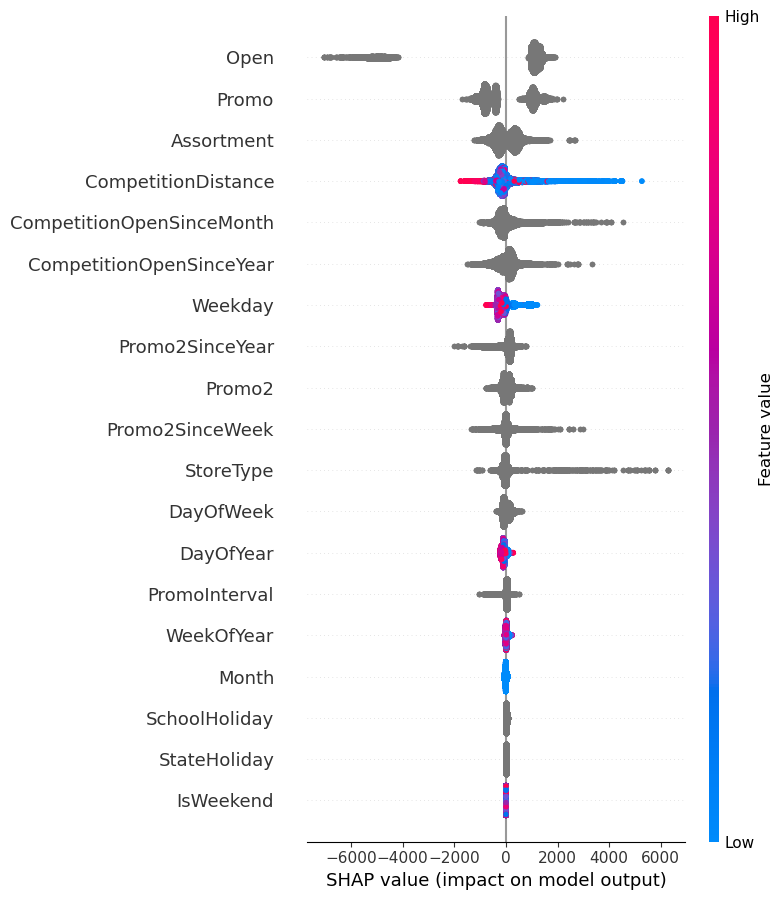

In [47]:
#SHAP plot for all time series
explainer=shap.Explainer(model_lgbm_default)
#SHap values for x_test
shap_values = explainer(X_test)
#plot
shap.summary_plot(shap_values,X_test)

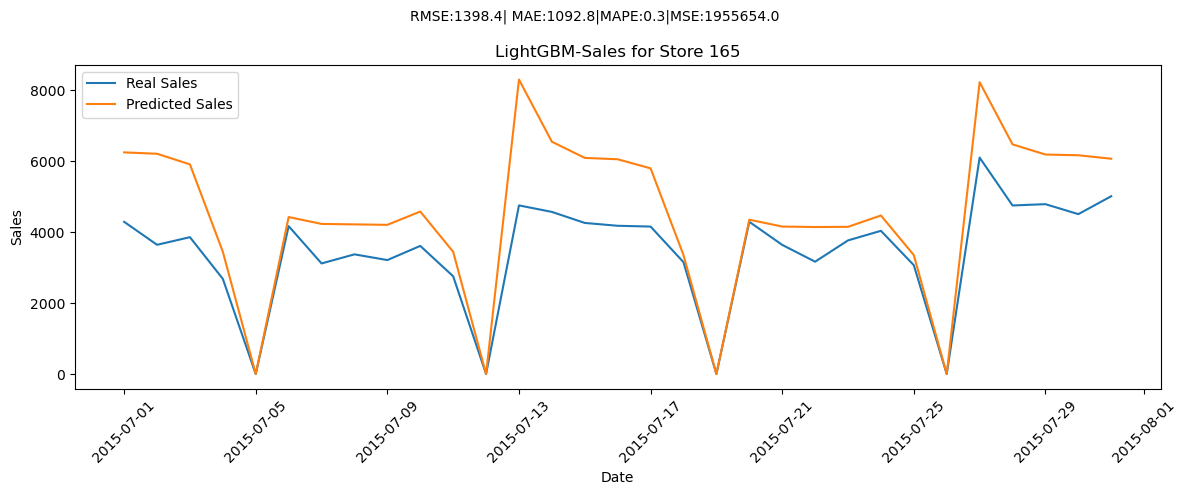

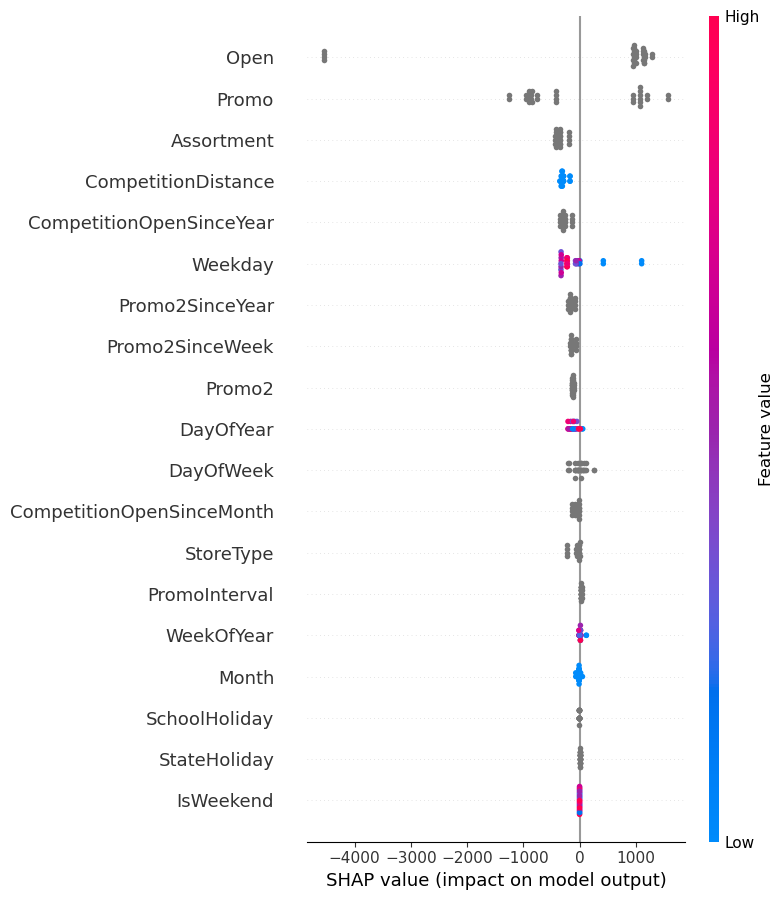

In [78]:
#Predictions vs Real values in test data for a specific store
#Default model
store_ID=165
store_df=test_data[test_data['Store']==store_ID]
store_df['Date']=pd.to_datetime(store_df['Date'])
store_df=store_df.sort_values(by='Date')

#Statistics
rmse_store=np.sqrt(mean_squared_error(store_df['y'],store_df['PredictedSalesLGBMdefault']))
mae_store=mean_absolute_error(store_df['y'],store_df['PredictedSalesLGBMdefault'])
#r2_store=r2_score(store_df['y'],store_df['PredictedSalesFULLLGBM'])
mape=mean_absolute_percentage_error(store_df['y'],store_df['PredictedSalesLGBMdefault'])
mse=mean_squared_error(store_df['y'],store_df['PredictedSalesLGBMdefault'])

#Plot for predictions vs real values
plt.figure(figsize=(12,5))
plt.plot(store_df['Date'],store_df['y'],label='Real Sales')
plt.plot(store_df['Date'],store_df['PredictedSalesLGBMdefault'],label='Predicted Sales')
plt.title(f'Sales Predicitions for Store {store_ID}')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.title(f'LightGBM-Sales for Store {store_ID}')
plt.suptitle(f"RMSE:{rmse_store:.1f}| MAE:{mae_store:.1f}|MAPE:{mape:.1f}|MSE:{mse:.1f}",fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#SHAP plot for specific store
#Predictions for store_ID
X_test_store=X_test[test_data['Store']==store_ID]
#SHAP Explainer 
explainer=shap.TreeExplainer(model_lgbm_default,feature_perturbation="tree_path_dependent")
#SHAP values
shap_values_store = explainer.shap_values(X_test_store)
# SHAP summary diagram
shap.summary_plot(shap_values_store,X_test_store,show=True)

#Virtual SHAP plot (Force plot for predictions)
shap.initjs()
shap.force_plot(explainer.expected_value,shap_values_store[:31],X_test_store[:31])


                      Feature  Importance
7         CompetitionDistance         667
9    CompetitionOpenSinceYear         450
8   CompetitionOpenSinceMonth         375
16                  DayOfYear         293
11            Promo2SinceWeek         261
5                   StoreType         174
1                        Open         166
6                  Assortment         131
15                    Weekday          95
0                   DayOfWeek          81


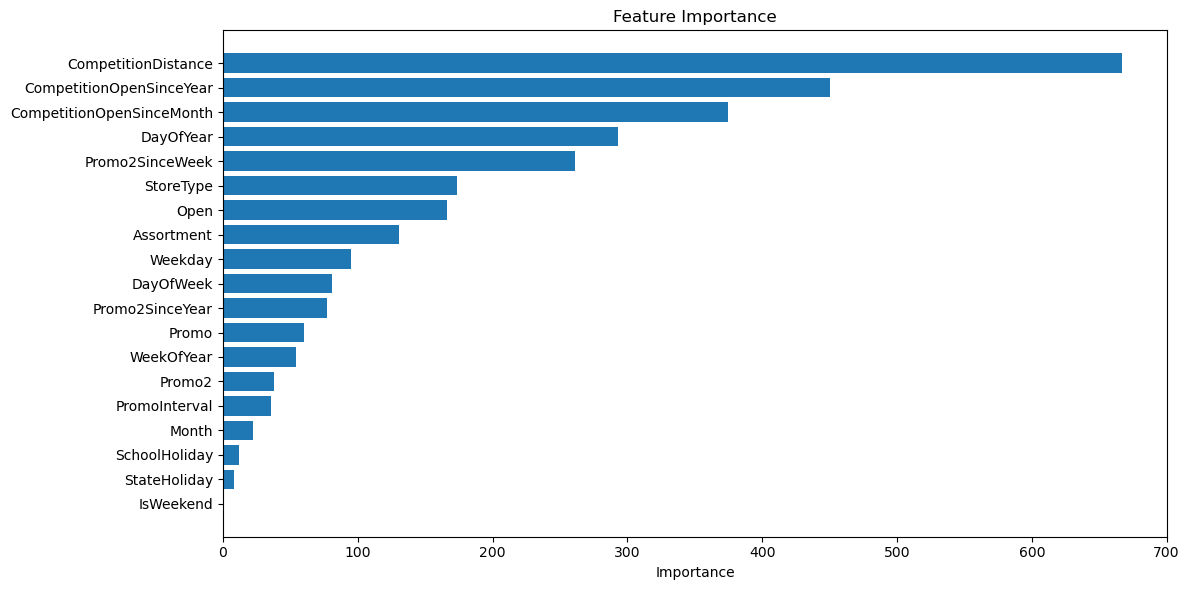

In [33]:
#Feature Importance Plot in order to choose the best variables for the model
var_selection=pd.DataFrame({'Feature':X_train.columns,'Importance':model_lgbm_default.feature_importances_}).sort_values(by='Importance',ascending=False)
print(var_selection.head(10)) #results

#Plot with the importance of each variable
plt.figure(figsize=(12,6))
plt.barh(var_selection['Feature'][::-1],var_selection['Importance'][::-1])
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

In [34]:
#Most important variables from the above plot 
important_features=['Promo2SinceWeek',"CompetitionOpenSinceMonth","CompetitionDistance","CompetitionOpenSinceYear","DayOfYear"]

#New model preparation with important variables
X_train_new=X_train[important_features]
X_test_new=X_test[important_features]

#New model
model_lgbm_new=LGBMRegressor(**par)
model_lgbm_new.fit(X_train_new,y_train,eval_set=[(X_test_new,y_test)],eval_metric="rmse",callbacks=[early_stopping(stopping_rounds=50),log_evaluation(period=100)])

Training until validation scores don't improve for 50 rounds
[100]	valid_0's rmse: 3489.01
Did not meet early stopping. Best iteration is:
[98]	valid_0's rmse: 3488.93


LGBMRegressor(max_depth=5, metric='rmse', min_data_in_leaf=10, num_leaves=5,
              objective='regression_l2', verbose=-1)

In [ ]:
#SHAP for second algorithm
explainer_lgbm=shap.Explainer(model_lgbm_new)
#SHap values for x_test
shap_values1 = explainer_lgbm(X_test_new)
#plot
shap.summary_plot(shap_values1, X_test_new)

In [35]:
#Predictions for second model
y_pred=model_lgbm_new.predict(X_test_new)
y_pred[y_pred<0]=0 #no negative predictions

#Statistics for model fit
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
mae=mean_absolute_error(y_test,y_pred)
mape=mean_absolute_percentage_error(y_test,y_pred)
#r2=r2_score(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
#Results
print(f"RMSE:{rmse:.1f}")
print(f"MAE:{mae:.1f}")
print(f"MAPE:{mape:.1f}")
#print(f"R²:{r2:.1f}")
print(f"MSE:{mse:.1f}")

RMSE:3488.9
MAE:2603.4
MAPE:3238770762539827200.0
MSE:12172616.6


In [36]:
#CROSS VALIDATION for second model
cv_scores=cross_val_score(model_lgbm_new,X_train_new,y_train,cv=tscv,scoring='neg_root_mean_squared_error')

#RESULTS
print("Cross-Validation RMSE Scores:",-cv_scores)
print("Mean RMSE:",-np.mean(cv_scores))
print("Standard Deviation of RMSE:",np.std(-cv_scores))

Cross-Validation RMSE Scores: [5143.38086816 3756.86180491 3770.77659827 3471.3358227  3591.54941475]
Mean RMSE: 3946.7809017584177
Standard Deviation of RMSE: 608.4629307253639


In [ ]:
#Statistics for every model predicitions per store ID
test_data=test_data.copy() 
test_data['PredictedSales']=y_pred

store_results = test_data.groupby('Store').apply(
    lambda df: pd.Series({
        'RMSE':np.sqrt(mean_squared_error(df['y'],df['PredictedSales'])),
        'MAE':mean_absolute_error(df['y'],df['PredictedSales']),
        #"MAPE":mean_absolute_percentage_error(df['y'],df['PredictedSales']),
        'R²':r2_score(df['y'],df['PredictedSales'])
    })
).reset_index()
print(store_results)
print(store_results["RMSE"].describe())

In [ ]:
#Predictions vs Real values in test data for a specific store with second model
store_ID=262
store_df=test_data[test_data['Store']==store_ID] #sorted data
store_df['Date']=pd.to_datetime(store_df['Date'])
store_df=store_df.sort_values(by='Date')

#Statistics
rmse_store=np.sqrt(mean_squared_error(store_df['y'],store_df['PredictedSales']))
mae_store=mean_absolute_error(store_df['y'],store_df['PredictedSales'])
#r2_store=r2_score(store_df['y'],store_df['PredictedSalesFULLLGBM'])
mape=mean_absolute_percentage_error(store_df['y'],store_df['PredictedSales'])
mse=mean_squared_error(store_df['y'],store_df['PredictedSales'])

#Plot for predictions vs real values
plt.figure(figsize=(12,5))
plt.plot(store_df['Date'],store_df['y'],label='Real Sales')
plt.plot(store_df['Date'],store_df['PredictedSales'],label='Predicted Sales')
plt.title(f'Sales Predicitions for Store {store_ID}')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.title(f'LightGBM-Sales for Store {store_ID}')
plt.suptitle(f"RMSE:{rmse_store:.1f}| MAE:{mae_store:.1f}|MAPE:{mape:.1f}|MSE:{mse:.1f}",fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Training until validation scores don't improve for 50 rounds
[100]	valid_0's rmse: 2987.82
Did not meet early stopping. Best iteration is:
[99]	valid_0's rmse: 2987.8


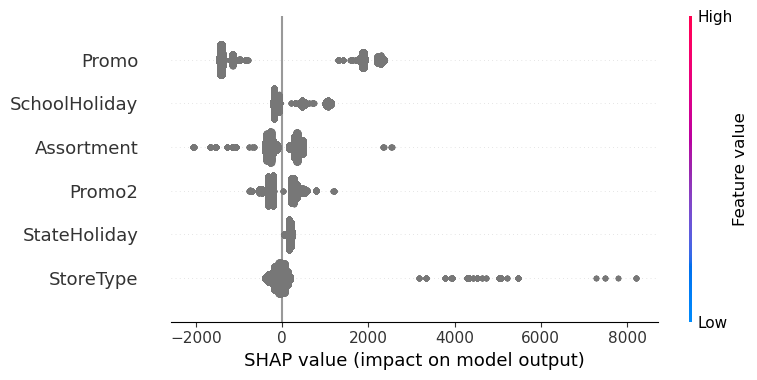

RMSE:2987.8
MAE:2279.1
MAPE:2438285613594761216.0
MSE:8926944.1
Cross-Validation RMSE Scores: [3271.0173611  3076.24619621 3333.55437981 3031.02702448 3087.15823137]
Mean RMSE: 3159.8006385939652
Standard Deviation of RMSE: 119.49931364935114


In [37]:
#New Model with some important variables from my point of view
features=['Promo2',"Promo","StoreType","Assortment","StateHoliday","SchoolHoliday"]

#New model preparation with important variables
X_train_neww=X_train[features]
X_test_neww=X_test[features]

#New model
model_lgbm_neww=LGBMRegressor(**par)
model_lgbm_neww.fit(X_train_neww,y_train,eval_set=[(X_test_neww,y_test)],eval_metric="rmse",callbacks=[early_stopping(stopping_rounds=50),log_evaluation(period=100)])

#SHAP
explainer_lgbm=shap.Explainer(model_lgbm_neww)
#SHap values for x_test
shap_values1 = explainer_lgbm(X_test_neww)
#plot
shap.summary_plot(shap_values1, X_test_neww)

#Predictions
y_pred=model_lgbm_neww.predict(X_test_neww)
y_pred[y_pred<0]=0 #no negative forecasts

#Statistics for model fit
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
mae=mean_absolute_error(y_test,y_pred)
mape=mean_absolute_percentage_error(y_test,y_pred)
#r2=r2_score(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
#Results
print(f"RMSE:{rmse:.1f}")
print(f"MAE:{mae:.1f}")
print(f"MAPE:{mape:.1f}")
#print(f"R²:{r2:.1f}")
print(f"MSE:{mse:.1f}")

#CROSS VALIDATION CHECK
cv_scores=cross_val_score(model_lgbm_neww,X_train_neww,y_train,cv=tscv,scoring='neg_root_mean_squared_error')
#RESULTS
print("Cross-Validation RMSE Scores:",-cv_scores)
print("Mean RMSE:",-np.mean(cv_scores))
print("Standard Deviation of RMSE:",np.std(-cv_scores))

test_data=test_data.copy() 
test_data['PredictedSaless']=y_pred

In [ ]:
#Predictions vs Real values in test data for a specific store for new model
store_ID=262
store_df=test_data[test_data['Store']==store_ID]
store_df['Date']=pd.to_datetime(store_df['Date'])
store_df=store_df.sort_values(by='Date')

#Statistics
rmse_store=np.sqrt(mean_squared_error(store_df['y'],store_df['PredictedSaless']))
mae_store=mean_absolute_error(store_df['y'],store_df['PredictedSaless'])
#r2_store=r2_score(store_df['y'],store_df['PredictedSaless'])
mape=mean_absolute_percentage_error(store_df['y'],store_df['PredictedSaless'])
mse=mean_squared_error(store_df['y'],store_df['PredictedSaless'])

#Plot for predictions vs real values
plt.figure(figsize=(12,5))
plt.plot(store_df['Date'],store_df['y'],label='Real Sales')
plt.plot(store_df['Date'],store_df['PredictedSaless'],label='Predicted Sales')
plt.title(f'Sales Predicitions for Store {store_ID}')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.title(f'LightGBM-Sales for Store {store_ID}')
plt.suptitle(f"RMSE:{rmse_store:.1f}| MAE:{mae_store:.1f}|MAPE:{mape:.1f}|MSE:{mse:.1f}",fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
##The best model is the one with all the variables
#As a result i use all the variables for future predictions

In [ ]:
#Time charachteristics for train data,test data and predictions data (t) 
def create_date_features(df):
    df["Date"]=pd.to_datetime(df["Date"])
    df["DayOfWeek"]=df["Date"].dt.dayofweek
    df["Month"]=df["Date"].dt.month
    df["DayOfYear"]=df["Date"].dt.day
    df["IsWeekend"]=(df["DayOfWeek"] >= 5).astype(int)
    return df

for df in [train_data,test_data,t]:
    create_date_features(df)

#Model variables
features=["StoreType","Assortment",'CompetitionOpenSinceMonth','CompetitionDistance',"CompetitionOpenSinceYear","Promo2SinceWeek","DayOfWeek",
"Month","DayOfYear","IsWeekend","Promo","Promo2","Promo2SinceYear","Store","PromoInterval","StateHoliday","SchoolHoliday","Open"]

#Variables that need to be converted as categorical
cat_cols=["CompetitionOpenSinceYear","Promo2SinceWeek","CompetitionOpenSinceMonth","StoreType","Assortment","Promo","Promo2","Promo2SinceYear","Store"
,"PromoInterval","StateHoliday","SchoolHoliday","Open"]

target="y" #sales

# Split data
X_train,y_train=train_data[features],train_data[target]
X_test,y_test=test_data[features],test_data[target]
X_future=t[features]

#Features as categorical in all datasets
for col in cat_cols:
    for df in [X_train, X_test, X_future]:
        df[col] = df[col].astype("category")


lgbmpred_model=LGBMRegressor()
lgbmpred_model.fit(X_train,y_train,eval_set=[(X_test,y_test)],eval_metric="rmse",callbacks=[early_stopping(stopping_rounds=50),log_evaluation(period=100)])
#Predictions
future_preds=lgbmpred_model.predict(X_future)
future_preds[future_preds<0]=0 #negative predictions equal to 0
t["PredictedSales"]=future_preds #predictions are saved on t data frame that contains future information

In [ ]:
#Choose a store id
store_id=165
#Predictions for specific store
store_preds=t[t["Store"]==store_id][["Date","PredictedSales"]].copy()
print(store_preds) #check

#I create a function that returns only the predictions for stores and the plot
def plot_store_forecast(store_id):
    store_data=t[t["Store"]==store_id].copy()
    store_data.sort_values("Date",inplace=True)
    
    plt.figure(figsize=(10,6))
    plt.plot(store_data["Date"],store_data["PredictedSales"],label=f"Forecast for Store {store_id}",color='green')
    plt.title(f"Light GBM-Predicted Sales for Store {store_id} (August - September 2015)")
    plt.xlabel("Date")
    plt.ylabel("Sales")
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

#Function
plot_store_forecast(165)


In [ ]:
#Split Store IDs in 3 parts becasuse python can't run
store_ids=test_data['Store'].unique()
n=len(store_ids)
one_third=n//3
two_third=2*(n//3)
first_part=store_ids[:one_third]
second_part=store_ids[one_third:two_third]
third_part=store_ids[two_third:]

In [ ]:
#Plots with predictions vs real values for test set for all the stores in first part
#Model with all the features
#For loop for all the stores
for store_id in first_part:
    store_data=test_data[test_data['Store']==store_id]

#Statistics
    rmse_store=np.sqrt(mean_squared_error(store_data['y'],store_data['PredictedSalesLGBMdefault']))
    mae_store=mean_absolute_error(store_data['y'],store_data['PredictedSalesLGBMdefault'])
    r2_store=r2_score(store_data['y'],store_data['PredictedSalesLGBMdefault'])
    mape=mean_absolute_percentage_error(store_data['y'],store_data['PredictedSalesLGBMdefault'])

#Plot for predictions vs real values
    plt.figure(figsize=(12,5))
    plt.plot(store_data['Date'],store_data['y'],label='Real Sales')
    plt.plot(store_data['Date'],store_data['PredictedSalesLGBMdefault'],label='Predicted Sales')
    plt.title(f'Sales Predicitions for Store {store_id}')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.title(f'Sales for Store {store_id}')
    plt.suptitle(f"RMSE:{rmse_store:.2f}| MAE:{mae_store:.2f}| R²:{r2_store:.4f} | MAPE:{mape:.4f}",fontsize=10)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
#Plots with predictions vs real values for all the stores in second part
#Model that includes all the features
#For loop for all the stores
for store_id in second_part:
    store_data=test_data[test_data['Store']==store_id]

#Statistics
    rmse_store=np.sqrt(mean_squared_error(store_data['y'],store_data['PredictedSalesLGBMdefault']))
    mae_store=mean_absolute_error(store_data['y'],store_data['PredictedSalesLGBMdefault'])
    r2_store=r2_score(store_data['y'],store_data['PredictedSalesLGBMdefault'])
    mape=mean_absolute_percentage_error(store_data['y'],store_data['PredictedSalesLGBMdefault'])

#Plot for predictions vs real values
    plt.figure(figsize=(12,5))
    plt.plot(store_data['Date'],store_data['y'],label='Real Sales')
    plt.plot(store_data['Date'],store_data['PredictedSalesLGBMdefault'],label='Predicted Sales')
    plt.title(f'Sales Predicitions for Store {store_id}')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.title(f'Sales for Store {store_id}')
    plt.suptitle(f"RMSE:{rmse_store:.2f}| MAE:{mae_store:.2f}| R²:{r2_store:.4f}| MAPE:{mape:.4f}",fontsize=10)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
#Plots with predictions vs real values for all the stores in third part
#Model with all the features
#For loop for all the stores
for store_id in third_part:
    store_data=test_data[test_data['Store']==store_id]

#Statistics
    rmse_store=np.sqrt(mean_squared_error(store_data['y'],store_data['PredictedSalesLGBMdefault']))
    mae_store=mean_absolute_error(store_data['y'],store_data['PredictedSalesLGBMdefault'])
    r2_store=r2_score(store_data['y'],store_data['PredictedSalesLGBMdefault'])
    mape=mean_absolute_percentage_error(store_data['y'],store_data['PredictedSalesLGBMdefault'])

#Plot for predictions vs real values
    plt.figure(figsize=(12,5))
    plt.plot(store_data['Date'],store_data['y'],label='Real Sales')
    plt.plot(store_data['Date'],store_data['PredictedSalesLGBMdefault'],label='Predicted Sales')
    plt.title(f'Sales Predicitions for Store {store_id}')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.title(f'Sales for Store {store_id}')
    plt.suptitle(f"RMSE:{rmse_store:.2f}| MAE:{mae_store:.2f}| R²:{r2_store:.4f}| MAPE:{mape:.4f}",fontsize=10)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
#Model with standarized features beacause of the outliers
#scaler=StandardScaler()
#dummy variables
#X_train_dummies=pd.get_dummies(X_train,drop_first=True)
#X_test_dummies=pd.get_dummies(X_test,drop_first=True)
#Merge with data
#X_train_dummies,X_test_dummies=X_train_dummies.align(X_test_dummies,fill_value=0,axis=1)
#X_train_scaled=scaler.fit_transform(X_train_dummies)
#X_test_scaled=scaler.transform(X_test_dummies)

#As dataframe
#X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train_dummies.columns)
#X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test_dummies.columns)
#Some columns have True or False in dummy variables
#print(X_train_dummies.dtypes.value_counts())
#print(X_test_dummies.dtypes.value_counts())

#bool_columns=X_train_dummies.select_dtypes(include=['bool']).columns
#print(bool_columns)
#bool_columns1=X_test_dummies.select_dtypes(include=['bool']).columns
#print(bool_columns1)

#Convert bool as int
#X_train_dummies[bool_columns]=X_train_dummies[bool_columns].astype(int)
#X_test_dummies[bool_columns]=X_test_dummies[bool_columns].astype(int)
#print(X_train_dummies.dtypes.value_counts())#check
#print(X_test_dummies.dtypes.value_counts())#check

#model with scaling
#model_lgbms=LGBMRegressor(**par)
#model_lgbms.fit(X_train_scaled,y_train,eval_set=[(X_test_scaled,y_test)],eval_metric="rmse",callbacks=[early_stopping(stopping_rounds=50),log_evaluation(period=100)])

##PROBLEM WITH FEATURE NAMESS###

## XGBoost model

In [ ]:
#XGBoost model
categorical_columns=['StoreType','Assortment','PromoInterval',"DayOfWeek","Open","CompetitionOpenSinceMonth","CompetitionOpenSinceYear","PromoInterval","Promo2SinceWeek","Promo2SinceYear"] 
for col in categorical_columns:
   X_train[col]=X_train[col].astype('category')
   X_test[col]=X_test[col].astype('category')

#Hyperparameter tuning
param_grid={
    'max_depth':[3,5],
    'learning_rate':[0.01,0.1,0.3],
    'n_estimators':[100,300,500]
}

#XGBoost Regressor
xgb=XGBRegressor(n_estimators=100, objective='reg:squarederror', random_state=42,enable_categorical=True)

#Grid Search
grid_search=GridSearchCV(estimator=xgb,param_grid=param_grid,scoring='neg_root_mean_squared_error',cv=3,n_jobs=-1,verbose=2)

#Model Train
grid_search.fit(X_train, y_train)
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best RMSE Score: {-grid_search.best_score_}")

In [38]:
#Preparation
target='y'
cols=['y','Date',"StateHolidayIndicators","PromotionFlags","day","year","month","HolidayIndicators","Customers","Store"] 
X_train=train_data.drop(columns=cols)
y_train=train_data[target]
X_test=test_data.drop(columns=cols)
y_test=test_data[target]

In [39]:
#XGBoost model with all the variables and parameters from hyperparameter tuning
categorical_columns=["StateHoliday",'StoreType','Assortment','PromoInterval',"DayOfWeek","Open","CompetitionOpenSinceMonth","CompetitionOpenSinceYear","PromoInterval","Promo2SinceWeek","Promo2SinceYear","Promo","Promo2"] 
for col in categorical_columns:
   X_train[col]=X_train[col].astype('category')
   X_test[col]=X_test[col].astype('category')

#model with best parameters
xgb_model=XGBRegressor(objective='reg:squarederror',learning_rate=0.3,max_depth=5,n_estimators=500,verbosity=1,enable_categorical=True)
xgb_model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.3, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=None, num_parallel_tree=None, ...)

In [40]:
#drop columns with predictions from x_test
X_test = X_test.loc[:, ~X_test.columns.str.startswith('Predicted')]

#predictions for first model
y_predict=xgb_model.predict(X_test)
y_predict[y_predict<0]=0

#model performance
rmse=np.sqrt(mean_squared_error(y_test,y_predict))
#r2=r2_score(y_test,y_predict)
mape=mean_absolute_percentage_error(y_test,y_predict)
#results
print(f"RMSE:{rmse:.1f}")
#print(f"R2:{r2:.1f}")
print(f"MAPE:{mape:.1f}")

#CROSS VALIDATION
cv_scores=cross_val_score(xgb_model,X_train,y_train,cv=tscv,scoring='neg_root_mean_squared_error')
#Results
print("Cross-Validation RMSE Scores:", -cv_scores)
print("Mean RMSE:", -np.mean(cv_scores))
print("Standard Deviation of RMSE:",np.std(-cv_scores))

RMSE:1002.6
MAPE:83556865302578720.0
Cross-Validation RMSE Scores: [1934.69569486 1358.69231411 1211.9414193  1056.28929118 1168.72531826]
Mean RMSE: 1346.0688075411406
Standard Deviation of RMSE: 309.85609658823836


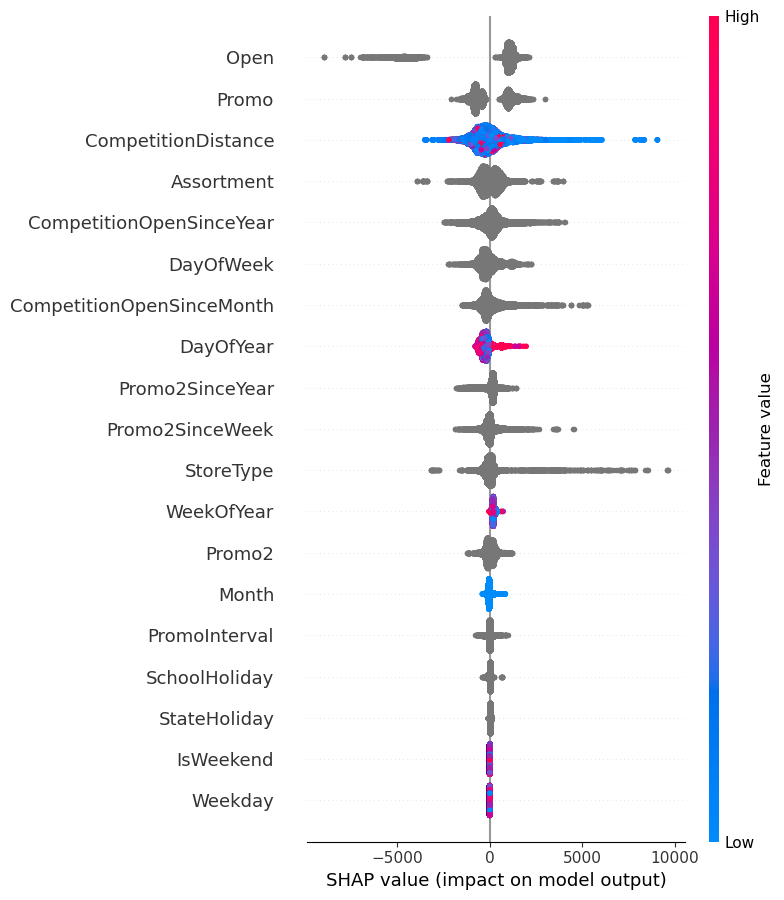

In [48]:
#SHAP for XGBOOST
explainer=shap.Explainer(xgb_model)
#SHap values for x_test
shap_values=explainer(X_test)
#plot
shap.summary_plot(shap_values,X_test)

In [49]:
#Statistics for every model predicitions per store ID with first model
test_data=test_data.copy() 
test_data['PredictedSalesXG']=y_predict

store_results = test_data.groupby('Store').apply(
    lambda df: pd.Series({
        'RMSE':np.sqrt(mean_squared_error(df['y'],df['PredictedSalesXG'])),
        'R²':r2_score(df['y'],df['PredictedSalesXG']),
       # "MAPE":mean_absolute_percentage_error(df['y'],df['PredictedSalesXG'])
    })
).reset_index()
print(store_results)
print(store_results["RMSE"].describe())

      Store         RMSE        R²
0         1   596.615839  0.866696
1         2   546.366407  0.925073
2         3   601.019436  0.951699
3         4  1293.158161  0.880006
4         5   645.119830  0.901989
...     ...          ...       ...
1110   1111   895.728286  0.809989
1111   1112  1677.046413  0.776133
1112   1113   697.735616  0.923259
1113   1114  3281.584633  0.838781
1114   1115  1126.307559  0.825601

[1115 rows x 3 columns]
count    1115.000000
mean      885.877596
std       469.762943
min       318.958490
25%       605.020621
50%       760.510430
75%      1019.689890
max      6233.750204
Name: RMSE, dtype: float64


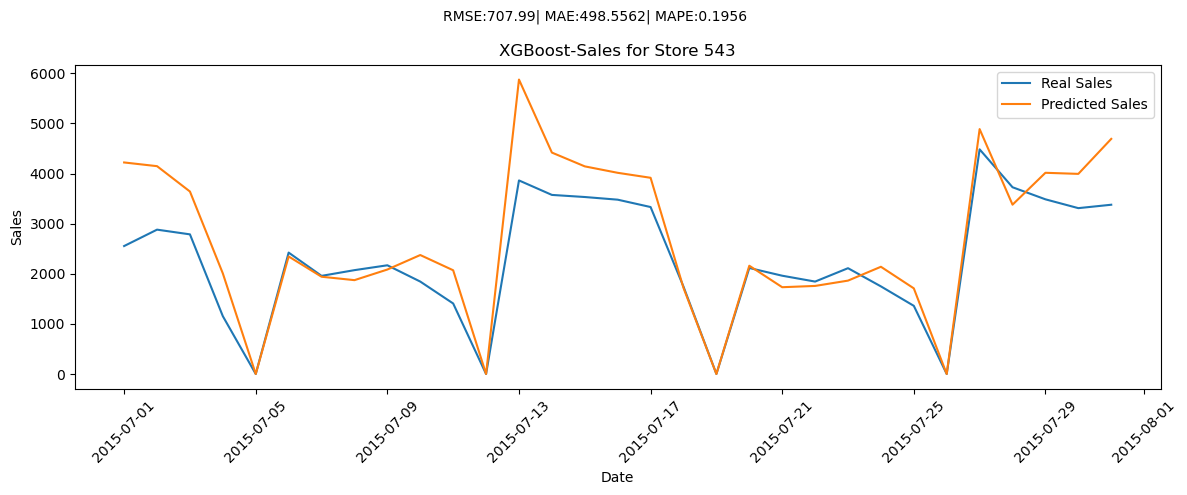

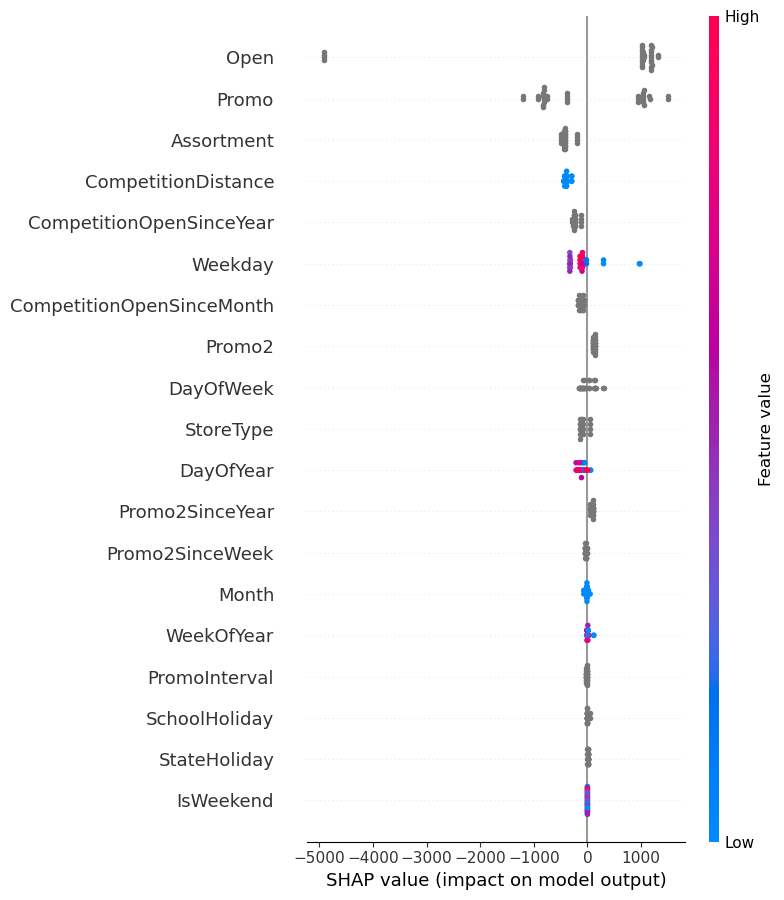

In [83]:
#Predictions vs real sales for a specific store
#XGBoost Model that has all variables - Parameters with Hyperparameter tuning
store_ID=543
store_df=test_data[test_data['Store']==store_ID]
store_df['Date']=pd.to_datetime(store_df['Date'])
store_df=store_df.sort_values(by='Date')

#Statistics
rmse_store=np.sqrt(mean_squared_error(store_df['y'],store_df['PredictedSalesXG']))
r2_store=r2_score(store_df['y'],store_df['PredictedSalesXG'])
mape=mean_absolute_percentage_error(store_df['y'],store_df['PredictedSalesXG'])
mae=mean_absolute_error(store_df["y"],store_df["PredictedSalesXG"])

#Plot for predictions vs real values
plt.figure(figsize=(12,5))
plt.plot(store_df['Date'],store_df['y'],label='Real Sales')
plt.plot(store_df['Date'],store_df['PredictedSalesXG'],label='Predicted Sales')
plt.title(f'Sales Predicitions for Store {store_ID}')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.title(f'XGBoost-Sales for Store {store_ID}')
plt.suptitle(f"RMSE:{rmse_store:.2f}| MAE:{mae:.4f}| MAPE:{mape:.4f}",fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#SHAP plot for specific store
#Predictions for specific store
X_test_store=X_test[test_data['Store']==store_ID]
#SHAP Explainer
explainer=shap.TreeExplainer(model_lgbm_default,feature_perturbation="tree_path_dependent")
#Shap values
shap_values_store=explainer.shap_values(X_test_store)
#SHAP summary plot
shap.summary_plot(shap_values_store,X_test_store,show=True)

#Virtual SHAP plot for predictions
shap.initjs()
shap.force_plot(explainer.expected_value,shap_values_store[:31],X_test_store[:31])


In [41]:
#model with default parameters
xgb_model_default=XGBRegressor(objective='reg:squarederror',enable_categorical=True)
xgb_model_default.fit(X_train,y_train)

#predictions for first model
y_predict_default=xgb_model_default.predict(X_test)
y_predict_default[y_predict_default<0]=0

#model performance
rmse=np.sqrt(mean_squared_error(y_test,y_predict_default))
print(f"RMSE:{rmse:.1f}")

#CROSS VALIDATION
cv_scores=cross_val_score(xgb_model_default,X_train, y_train,cv=tscv,scoring='neg_root_mean_squared_error')
#Results
print("Cross-Validation RMSE Scores:", -cv_scores)
print("Mean RMSE:", -np.mean(cv_scores))
print("Standard Deviation of RMSE:",np.std(-cv_scores))

#Statistics for every model predicitions per store ID with default model
test_data=test_data.copy() 
test_data['PredictedSalesXGdefault']=y_predict_default

store_results2 = test_data.groupby('Store').apply(
    lambda df: pd.Series({
        'RMSE':np.sqrt(mean_squared_error(df['y'],df['PredictedSalesXGdefault'])),
    })
).reset_index()
print(store_results2)
print(store_results2["RMSE"].describe())

RMSE:1165.7
Cross-Validation RMSE Scores: [1989.50992231 1395.84065624 1328.70537475 1205.5691073  1273.58339781]
Mean RMSE: 1438.641691683511
Standard Deviation of RMSE: 282.4679804477499
      Store         RMSE
0         1   668.339903
1         2   600.388624
2         3   667.429787
3         4  1662.259755
4         5   590.222748
...     ...          ...
1110   1111   988.512964
1111   1112  1265.535472
1112   1113   663.756095
1113   1114  4926.282283
1114   1115  1281.730590

[1115 rows x 2 columns]
count    1115.000000
mean     1023.048969
std       558.971051
min       341.759450
25%       683.785446
50%       858.824249
75%      1203.643797
max      5871.679617
Name: RMSE, dtype: float64


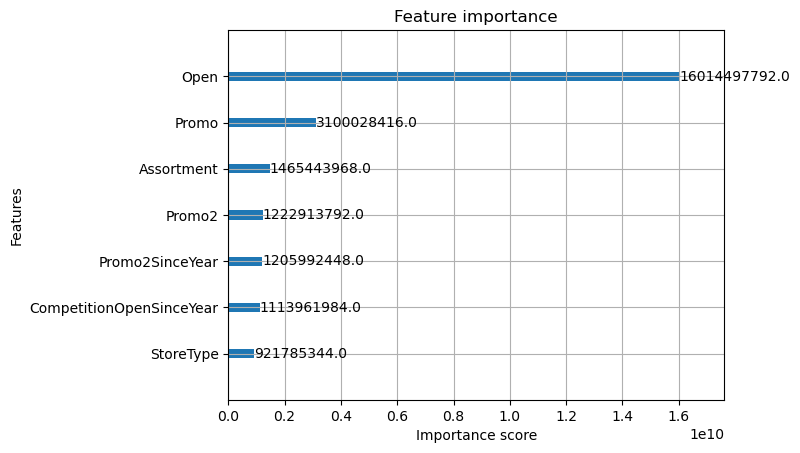

In [42]:
#Variables selection with feature importance plot
plot_importance(xgb_model,importance_type='gain',max_num_features=7)
plt.show()

In [ ]:
#important features from feature importance plot
selected_features=['Promo2','Open','Promo2SinceYear',"Promo","Assortment","StoreType","CompetitionOpenSinceYear"]
X_train_new=X_train[selected_features]
X_test_new=X_test[selected_features]

In [43]:
#new model with important features
xgb_model1=XGBRegressor(objective='reg:squarederror',learning_rate=0.05,verbosity=1,enable_categorical=True)
xgb_model1.fit(X_train_new,y_train)

#predictions
y_predict1=xgb_model1.predict(X_test_new)
y_predict1[y_predict1<0]=0

#model performance
rmse=np.sqrt(mean_squared_error(y_test,y_predict))
r2=r2_score(y_test,y_predict)
mape=mean_absolute_percentage_error(y_test,y_predict)
#results
print(f"RMSE:{rmse:.1f}")
print(f"R2:{r2:.1f}")
print(f"MAPE:{mape:.1f}")

RMSE:1002.6
R2:0.9
MAPE:83556865302578720.0


In [ ]:
#SHAP for XGBOOST
explainer=shap.Explainer(xgb_model1)
#SHap values for x_test
shap_values=explainer(X_test_new)
#plot
shap.summary_plot(shap_values, X_test_new)

In [44]:
#CROSS VALIDATION
cv_scores=cross_val_score(xgb_model1, X_train_new, y_train,cv=tscv,scoring='neg_root_mean_squared_error')
#Results
print("Cross-Validation RMSE Scores:", -cv_scores)
print("Mean RMSE:", -np.mean(cv_scores))
print("Standard Deviation of RMSE:",np.std(-cv_scores))

Cross-Validation RMSE Scores: [5098.05313851 3626.09383524 3687.01608489 3336.62209816 3557.6783442 ]
Mean RMSE: 3861.0927002012977
Standard Deviation of RMSE: 629.7186584973672


In [ ]:
#Statistics for every model predicitions per store ID
test_data=test_data.copy() 
test_data['PredictedSalesXG1']=y_predict1

store_results = test_data.groupby('Store').apply(
    lambda df: pd.Series({
        'RMSE':np.sqrt(mean_squared_error(df['y'],df['PredictedSalesXG1'])),
        #'R²':r2_score(df['y'],df['PredictedSalesXG1']),
       # "MAPE":mean_absolute_percentage_error(df['y'],df['PredictedSalesXG1'])
    })
).reset_index()
print(store_results)
print(store_results["RMSE"].describe())

In [ ]:
#Predictions for a specific store
store_ID=262
store_df=test_data[test_data['Store']==store_ID]
store_df['Date']=pd.to_datetime(store_df['Date'])
store_df=store_df.sort_values(by='Date')

#Statistics
rmse_store=np.sqrt(mean_squared_error(store_df['y'],store_df['PredictedSalesXG1']))
r2_store=r2_score(store_df['y'],store_df['PredictedSalesXG1'])
mape=mean_absolute_percentage_error(store_df['y'],store_df['PredictedSalesXG1'])
mae=mean_absolute_error(store_df["y"],store_df["PredictedSalesXG1"])

#Plot for predictions vs real values
plt.figure(figsize=(12,5))
plt.plot(store_df['Date'],store_df['y'],label='Real Sales')
plt.plot(store_df['Date'],store_df['PredictedSalesXG1'],label='Predicted Sales')
plt.title(f'Sales Predicitions for Store {store_ID}')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.title(f'XGBoost-Sales for Store {store_ID}')
plt.suptitle(f"RMSE:{rmse_store:.2f}| MAE:{mae:.4f}| MAPE:{mape:.4f}",fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#Plots for MODEL WITH ALL FEATURES
#Plots with predictions vs real values for all the stores in first part 
#For loop for all the stores
for store_id in first_part:
    store_data=test_data[test_data['Store']==store_id]
    store_data['Date']=pd.to_datetime(store_data['Date'])
    store_data=store_data.sort_values(by='Date')

#Statistics
    rmse_store=np.sqrt(mean_squared_error(store_data['y'],store_data['PredictedSalesXG']))
    r2_store=r2_score(store_data['y'],store_data['PredictedSalesXG'])
    mape=mean_absolute_percentage_error(store_data['y'],store_data['PredictedSalesXG'])

#Plot for predictions vs real values
    plt.figure(figsize=(12,5))
    plt.plot(store_data['Date'],store_data['y'],label='Real Sales')
    plt.plot(store_data['Date'],store_data['PredictedSalesXG'],label='Predicted Sales')
    plt.title(f'Sales Predicitions for Store {store_id}')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.title(f'Sales for Store {store_id}')
    plt.suptitle(f"RMSE:{rmse_store:.2f}|R²:{r2_store:.4f}| MAPE:{mape:.4f}",fontsize=10)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
#Plots for MODEL WITH ALL FEATURES
#Plots with predictions vs real values  for all the stores in second part
#For loop for all the stores
for store_id in second_part:
    store_data=test_data[test_data['Store']==store_id]
    store_data['Date']=pd.to_datetime(store_data['Date'])
    store_data=store_data.sort_values(by='Date')

#Statistics
    rmse_store=np.sqrt(mean_squared_error(store_data['y'],store_data['PredictedSalesXG']))
    r2_store=r2_score(store_data['y'],store_data['PredictedSalesXG'])
    mape=mean_absolute_percentage_error(store_data['y'],store_data['PredictedSalesXG'])

#Plot for predictions vs real values
    plt.figure(figsize=(12,5))
    plt.plot(store_data['Date'],store_data['y'],label='Real Sales')
    plt.plot(store_data['Date'],store_data['PredictedSalesXG'],label='Predicted Sales')
    plt.title(f'Sales Predicitions for Store {store_id}')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.title(f'Sales for Store {store_id}')
    plt.suptitle(f"RMSE:{rmse_store:.2f}|R²:{r2_store:.4f}| MAPE:{mape:.4f}",fontsize=10)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
#Plots for MODEL WITH ALL FEATURES
#Plots with predictions vs real values for all the stores in third part
#For loop for all the stores
for store_id in third_part:
    store_data=test_data[test_data['Store']==store_id]
    store_data['Date']=pd.to_datetime(store_data['Date'])
    store_data=store_data.sort_values(by='Date')

#Statistics
    rmse_store=np.sqrt(mean_squared_error(store_data['y'],store_data['PredictedSalesXG']))
    r2_store=r2_score(store_data['y'],store_data['PredictedSalesXG'])
    mape=mean_absolute_percentage_error(store_data['y'],store_data['PredictedSalesXG'])

#Plot for predictions vs real values
    plt.figure(figsize=(12,5))
    plt.plot(store_data['Date'],store_data['y'],label='Real Sales')
    plt.plot(store_data['Date'],store_data['PredictedSalesXG'],label='Predicted Sales')
    plt.title(f'Sales Predicitions for Store {store_id}')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.title(f'Sales for Store {store_id}')
    plt.suptitle(f"RMSE:{rmse_store:.2f}|R²:{r2_store:.4f}| MAPE:{mape:.4f}",fontsize=10)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [45]:
#second model with some important variables that i have chosen
sel_features=['SchoolHoliday','Promo2','Promo','StoreType',"Assortment","StateHoliday"]
X_train_neww=X_train[sel_features]
X_test_neww=X_test[sel_features]

#second model
xgb_model_second=XGBRegressor(objective='reg:squarederror',learning_rate=0.05,verbosity=1,enable_categorical=True)
xgb_model_second.fit(X_train_neww,y_train)

#predictions
y_p=xgb_model_second.predict(X_test_neww)
y_p[y_p<0]=0

#model performance
rmse=np.sqrt(mean_squared_error(y_test,y_p))
r2=r2_score(y_test,y_p)
mape=mean_absolute_percentage_error(y_test,y_p)
#results
print(f"MAPE:{mape:.4f}")
print(f"RMSE:{rmse:.4f}")
print(f"R2:{r2:.4f}")

MAPE:2428293735030938624.0000
RMSE:2982.2114
R2:0.3162


In [46]:
#CROSS VALIDATION
cv_scores=cross_val_score(xgb_model_second, X_train_neww, y_train,cv=tscv,scoring='neg_root_mean_squared_error')
#Results
print("Cross-Validation RMSE Scores:", -cv_scores)
print("Mean RMSE:", -np.mean(cv_scores))
print("Standard Deviation of RMSE:",np.std(-cv_scores))

Cross-Validation RMSE Scores: [3267.6572771  3070.99356188 3326.9887137  3028.25308215 3081.27283203]
Mean RMSE: 3155.0330933700125
Standard Deviation of RMSE: 119.02044561708892


In [ ]:
#SHAP for XGBOOST second model
explainer=shap.Explainer(xgb_model_second)
#SHap values for x_test
shap_values=explainer(X_test_neww)
#plot
shap.summary_plot(shap_values,X_test_neww)

In [ ]:
#Statistics for every model predicitions per store ID with new model
test_data=test_data.copy() 
test_data['PredictedSalesXGBOOST']=y_p

store_results = test_data.groupby('Store').apply(
    lambda df: pd.Series({
        'RMSE':np.sqrt(mean_squared_error(df['y'],df['PredictedSalesXGBOOST'])),
        'R²':r2_score(df['y'],df['PredictedSalesXGBOOST']),
        "MAPE":mean_absolute_percentage_error(df['y'],df['PredictedSalesXGBOOST'])
    })
).reset_index()
print(store_results)
print(store_results["RMSE"].describe())

In [ ]:
#Predictions for a specific store with new model
store_ID=262
store_df=test_data[test_data['Store']==store_ID]
store_df['Date']=pd.to_datetime(store_df['Date'])
store_df=store_df.sort_values(by='Date')

#Statistics
rmse_store=np.sqrt(mean_squared_error(store_df['y'],store_df['PredictedSalesXGBOOST']))
r2_store=r2_score(store_df['y'],store_df['PredictedSalesXGBOOST'])
mape=mean_absolute_percentage_error(store_df['y'],store_df['PredictedSalesXGBOOST'])

#Plot for predictions vs real values
plt.figure(figsize=(12,5))
plt.plot(store_df['Date'],store_df['y'],label='Real Sales')
plt.plot(store_df['Date'],store_df['PredictedSalesXGBOOST'],label='Predicted Sales')
plt.title(f'Sales Predicitions for Store {store_ID}')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.title(f'Sales for Store {store_ID}')
plt.suptitle(f"RMSE:{rmse_store:.2f}| R²:{r2_store:.4f}| MAPE:{mape:.4f}",fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#Plots with predictions vs real values for all the stores in first part with new model
#For loop for all the stores
for store_id in first_part:
    store_data=test_data[test_data['Store']==store_id]
    store_data['Date']=pd.to_datetime(store_data['Date'])
    store_data=store_data.sort_values(by='Date')

#Statistics
    rmse_store=np.sqrt(mean_squared_error(store_data['y'],store_data['PredictedSalesXGBOOST']))
    r2_store=r2_score(store_data['y'],store_data['PredictedSalesXGBOOST'])
    mape=mean_absolute_percentage_error(store_data['y'],store_data['PredictedSalesXGBOOST'])

#Plot for predictions vs real values
    plt.figure(figsize=(12,5))
    plt.plot(store_data['Date'],store_data['y'],label='Real Sales')
    plt.plot(store_data['Date'],store_data['PredictedSalesXGBOOST'],label='Predicted Sales')
    plt.title(f'Sales Predicitions for Store {store_id}')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.title(f'Sales for Store {store_id}')
    plt.suptitle(f"RMSE:{rmse_store:.2f}|R²:{r2_store:.4f}| MAPE:{mape:.4f}",fontsize=10)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
#Plots with predictions vs real values for all the stores in second part with new model
#For loop for all the stores
for store_id in second_part:
    store_data=test_data[test_data['Store']==store_id]
    store_data['Date']=pd.to_datetime(store_data['Date'])
    store_data=store_data.sort_values(by='Date')

#Statistics
    rmse_store=np.sqrt(mean_squared_error(store_data['y'],store_data['PredictedSalesXGBOOST']))
    r2_store=r2_score(store_data['y'],store_data['PredictedSalesXGBOOST'])
    mape=mean_absolute_percentage_error(store_data['y'],store_data['PredictedSalesXGBOOST'])

#Plot for predictions vs real values
    plt.figure(figsize=(12,5))
    plt.plot(store_data['Date'],store_data['y'],label='Real Sales')
    plt.plot(store_data['Date'],store_data['PredictedSalesXGBOOST'],label='Predicted Sales')
    plt.title(f'Sales Predicitions for Store {store_id}')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.title(f'Sales for Store {store_id}')
    plt.suptitle(f"RMSE:{rmse_store:.2f}|R²:{r2_store:.4f}| MAPE:{mape:.4f}",fontsize=10)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
#Plots with predictions vs real values for all the stores in third part with new model
#For loop for all the stores
for store_id in third_part:
    store_data=test_data[test_data['Store']==store_id]
    store_data['Date']=pd.to_datetime(store_data['Date'])
    store_data=store_data.sort_values(by='Date')

#Statistics
    rmse_store=np.sqrt(mean_squared_error(store_data['y'],store_data['PredictedSalesXGBOOST']))
    r2_store=r2_score(store_data['y'],store_data['PredictedSalesXGBOOST'])
     mape=mean_absolute_percentage_error(store_data['y'],store_data['PredictedSalesXGBOOST'])

#Plot for predictions vs real values
    plt.figure(figsize=(12,5))
    plt.plot(store_data['Date'],store_data['y'],label='Real Sales')
    plt.plot(store_data['Date'],store_data['PredictedSalesXGBOOST'],label='Predicted Sales')
    plt.title(f'Sales Predicitions for Store {store_id}')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.title(f'Sales for Store {store_id}')
    plt.suptitle(f"RMSE:{rmse_store:.2f}|R²:{r2_store:.4f}| MAPE:{mape:.4f}",fontsize=10)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
##PREDICTIONS FOR FIRST MODEL because it has the best accuracy

#Time charachteristics for train data,test data and predictions data (t) 
def create_date_features(df):
    df["Date"]=pd.to_datetime(df["Date"])
    df["DayOfWeek"]=df["Date"].dt.dayofweek
    df["Month"]=df["Date"].dt.month
    df["DayOfYear"]=df["Date"].dt.day
    df["IsWeekend"]=(df["DayOfWeek"] >= 5).astype(int)
    return df

for df in [train_data,test_data,t]:
    create_date_features(df)

#Model variables
xg_features=["StoreType","Assortment",'CompetitionOpenSinceMonth','CompetitionDistance',"CompetitionOpenSinceYear","Promo2SinceWeek","DayOfWeek",
"Month","DayOfYear","IsWeekend","Promo","Promo2","Promo2SinceYear","PromoInterval","StateHoliday","SchoolHoliday","Open"]

#Variables that need to be converted as categorical
cat_cols=["CompetitionOpenSinceYear","Open","Promo2SinceWeek","CompetitionOpenSinceMonth","Assortment","Promo","Promo2","Promo2SinceYear"
,"PromoInterval","StateHoliday","SchoolHoliday","StoreType"]

target="y"

# Split data
X_train,y_train=train_data[xg_features],train_data[target]
X_test,y_test=test_data[xg_features],test_data[target]
X_futuree=t[xg_features]

#Features as categorical in all datasets
for col in cat_cols:
    for df in [X_train, X_test, X_futuree]:
        df[col] = df[col].astype("category")


xgpred_model=XGBRegressor(objective='reg:squarederror',learning_rate=0.3,max_depth=5,n_estimators=500,verbosity=1,enable_categorical=True)
xgpred_model.fit(X_train,y_train,eval_set=[(X_test,y_test)])
#Predictions
future_xgpreds=xgpred_model.predict(X_futuree)
future_xgpreds[future_xgpreds<0]=0 #negative predictions equal to 0
t["xgPredictedSales"]=future_xgpreds


In [ ]:
#Choose a store id
store_id=251
#Predictions for specific store
store_preds=t[t["Store"]==store_id][["Date","xgPredictedSales"]].copy()
print(store_preds) #check

#I create a function that returns only the predictions for stores
def plot_store_forecast_xg(store_id):
    store_data=t[t["Store"]==store_id].copy()
    store_data.sort_values("Date",inplace=True)
    
    plt.figure(figsize=(10,6))
    plt.plot(store_data["Date"],store_data["xgPredictedSales"],label=f"Forecast for Store {store_id}",color='green')
    plt.title(f"XG Boost-Predicted Sales for Store {store_id} (August - September 2015)")
    plt.xlabel("Date")
    plt.ylabel("Sales")
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

#Function
plot_store_forecast_xg(251)

### Further Experiments

In [ ]:
#code that we can see how rmse changes when removing a variable 
#I tried this in order to see if i could reduce negative predictions in the model
#Features
xg_features=["StoreType", "Assortment", 'CompetitionOpenSinceMonth','CompetitionDistance', "CompetitionOpenSinceYear", "Open","Promo2SinceWeek", "DayOfWeek", "Month", "DayOfYear",
"IsWeekend", "Promo", "Promo2","Promo2SinceYear","Store","PromoInterval", "StateHoliday", "SchoolHoliday"]
target="y"

#Empty vector
results = []

for feature in xg_features:
    
    trial_features=[f for f in xg_features if f != feature]
    X_train_subset=X_train[trial_features]
    X_test_subset=X_test[trial_features]

    #Model
    model = XGBRegressor(objective='reg:squarederror', learning_rate=0.3,max_depth=5, n_estimators=500, enable_categorical=True)
    model.fit(X_train_subset, y_train)

    #Forecast
    preds=model.predict(X_test_subset)
    preds=np.clip(preds,a_min=0,a_max=None) 
    #RMSE
    rmse=np.sqrt(mean_squared_error(y_test,preds))
    results.append((feature,rmse))

# Results
results_df = pd.DataFrame(results, columns=["Removed_Feature", "RMSE"])
results_df.sort_values("RMSE")

In [ ]:
#MAPE gets enormous values on our data because it is sensitive with zero sales
#MAPE without outliers

#def calculate_mape(y_true, y_pred):
    #y_true, y_pred = np.array(y_true), np.array(y_pred)
    #non_zero = y_true != 0
    #return np.mean(np.abs((y_true[non_zero] - y_pred[non_zero]) / y_true[non_zero])) * 100

#print(calculate_mape(store_df['y'],store_df['PredictedSales']))

### PCA #not needed

In [ ]:
#PCA  
#from sklearn.preprocessing import StandardScaler
#from sklearn.decomposition import PCA

In [ ]:
#Dummy variables for categorical data
#data = pd.get_dummies(data, columns=['StoreType'], prefix='StoreType')
#data = pd.get_dummies(data, columns=['Assortment'], prefix='Assortment')
#data = pd.get_dummies(data, columns=['PromoInterval'], prefix='PromoInterval') 

In [ ]:
#data.columns

In [ ]:
#We have T or F so i change the type in order to get 0 or 1 values
#data["Assortment_a"] = data["Assortment_a"].astype(int)
#data["Assortment_b"] = data["Assortment_b"].astype(int)
#data["Assortment_c"] = data["Assortment_c"].astype(int)

#data["PromoInterval_Feb,May,Aug,Nov"] = data["PromoInterval_Feb,May,Aug,Nov"].astype(int)
#data["PromoInterval_Jan,Apr,Jul,Oct"] = data["PromoInterval_Jan,Apr,Jul,Oct"].astype(int)
#data["PromoInterval_Mar,Jun,Sept,Dec"] = data["PromoInterval_Mar,Jun,Sept,Dec"].astype(int)

#data["StoreType_a"] = data["StoreType_a"].astype(int)
#data["StoreType_b"] = data["StoreType_b"].astype(int)
#data["StoreType_c"] = data["StoreType_c"].astype(int)
#data["StoreType_d"] = data["StoreType_d"].astype(int)

In [ ]:
#data.head(1) #check

In [ ]:
#data.columns

In [ ]:
#features=['DayOfWeek', 'Customers', 'Open', 'CompetitionDistance','CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear','PromotionFlags', 'HolidayIndicators',
#'StoreType_a', 'StoreType_b', 'StoreType_c', 'StoreType_d','Assortment_a', 'Assortment_b', 'Assortment_c','PromoInterval_Feb,May,Aug,Nov', 'PromoInterval_Jan,Apr,Jul,Oct',
#'PromoInterval_Mar,Jun,Sept,Dec']

#X=data[features]
#y=data['Sales']

#scaler=StandardScaler()
#X_scaled=scaler.fit_transform(X)

#pca=PCA(n_components=5)
#X_pca=pca.fit_transform(X_scaled)

#print(pca.explained_variance_ratio_)

In [ ]:
#pca_results=pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.n_components_)],index=X.columns)
#pca_results = pca_results.round(3)
#print(pca_results)